In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\crime_data.csv')
df

places  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

# EDA

In [3]:
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [4]:
df.dtypes

places       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

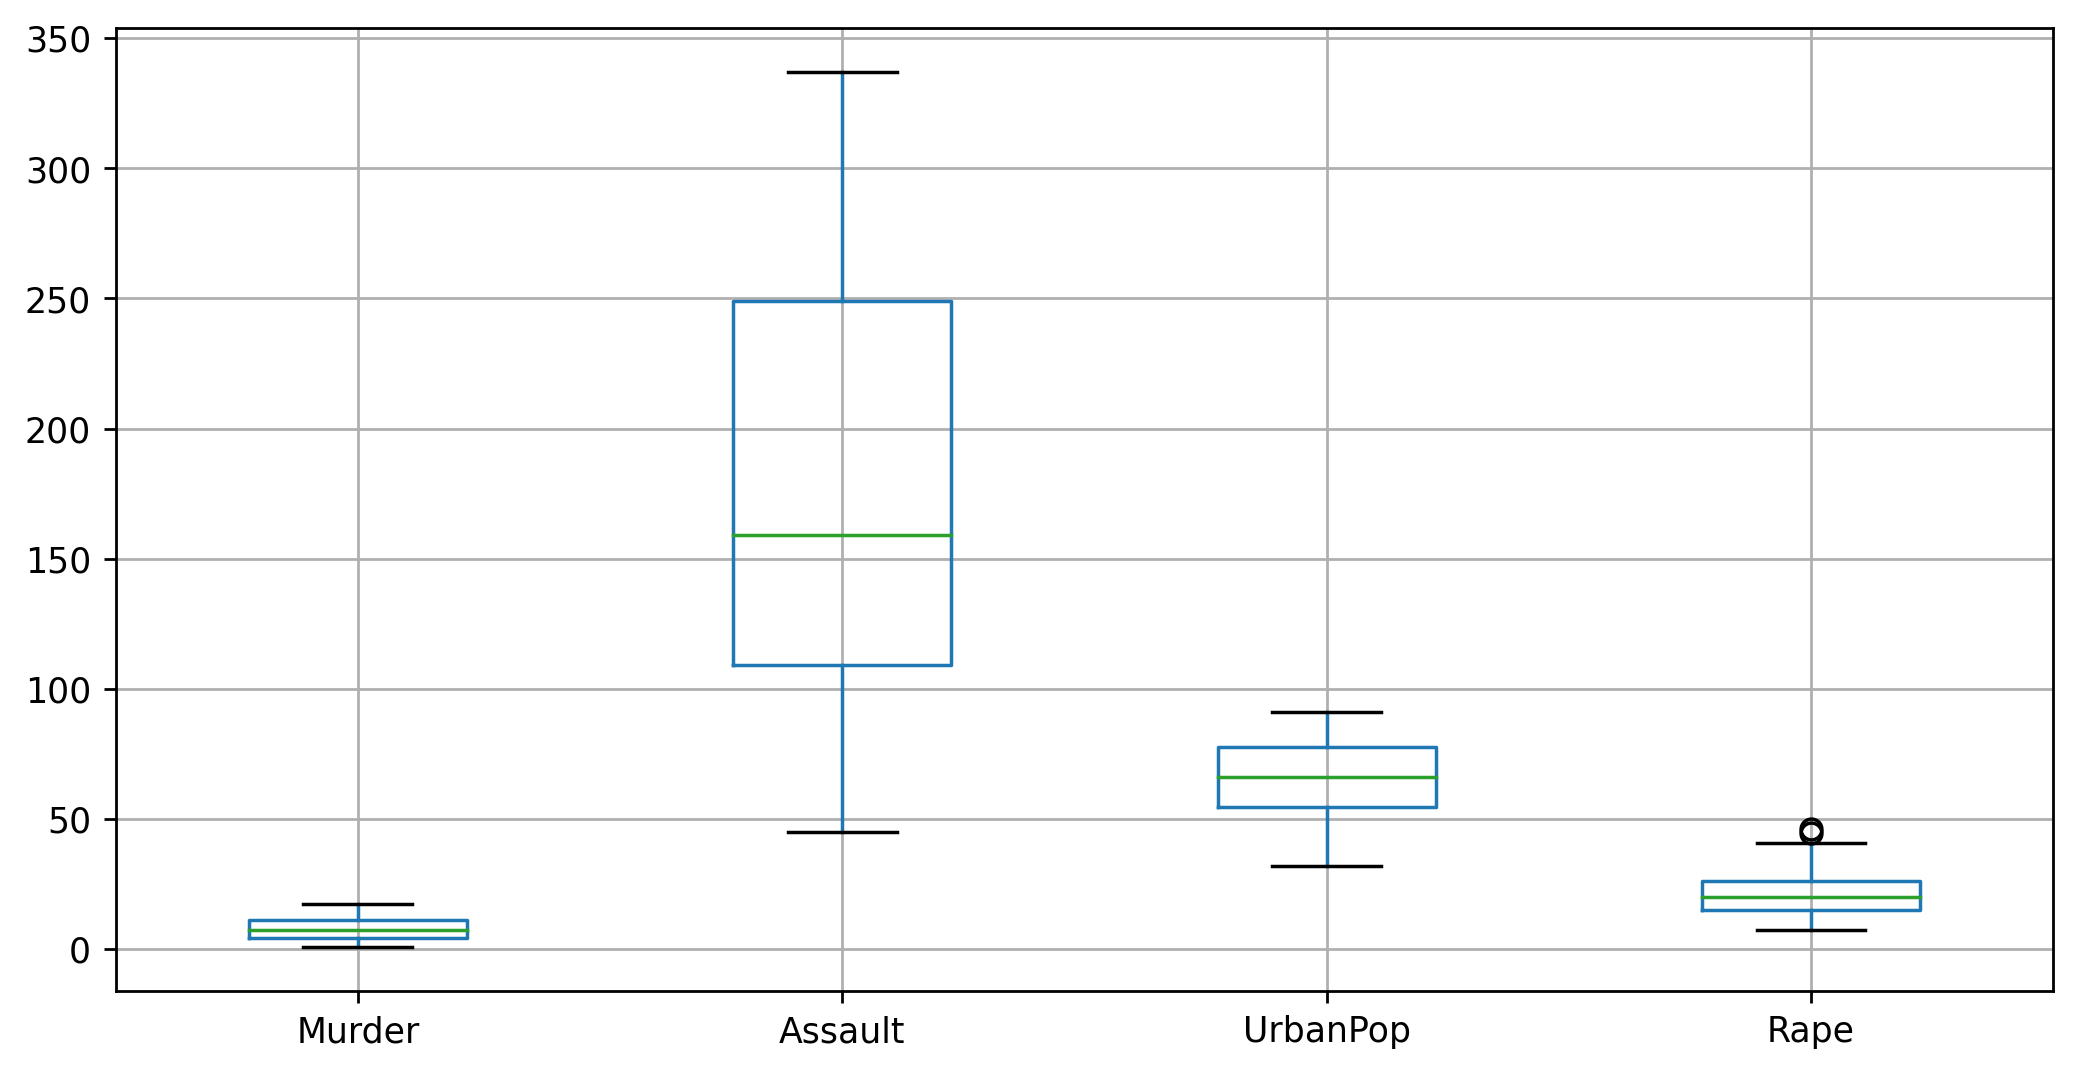

In [8]:
df.boxplot()

In [9]:
import plotly.express as pe
pe.box(x=df['Rape'])

In [10]:
df.loc[df['Rape'] > 40.6,'Rape']=40.6

<AxesSubplot:xlabel='Rape'>

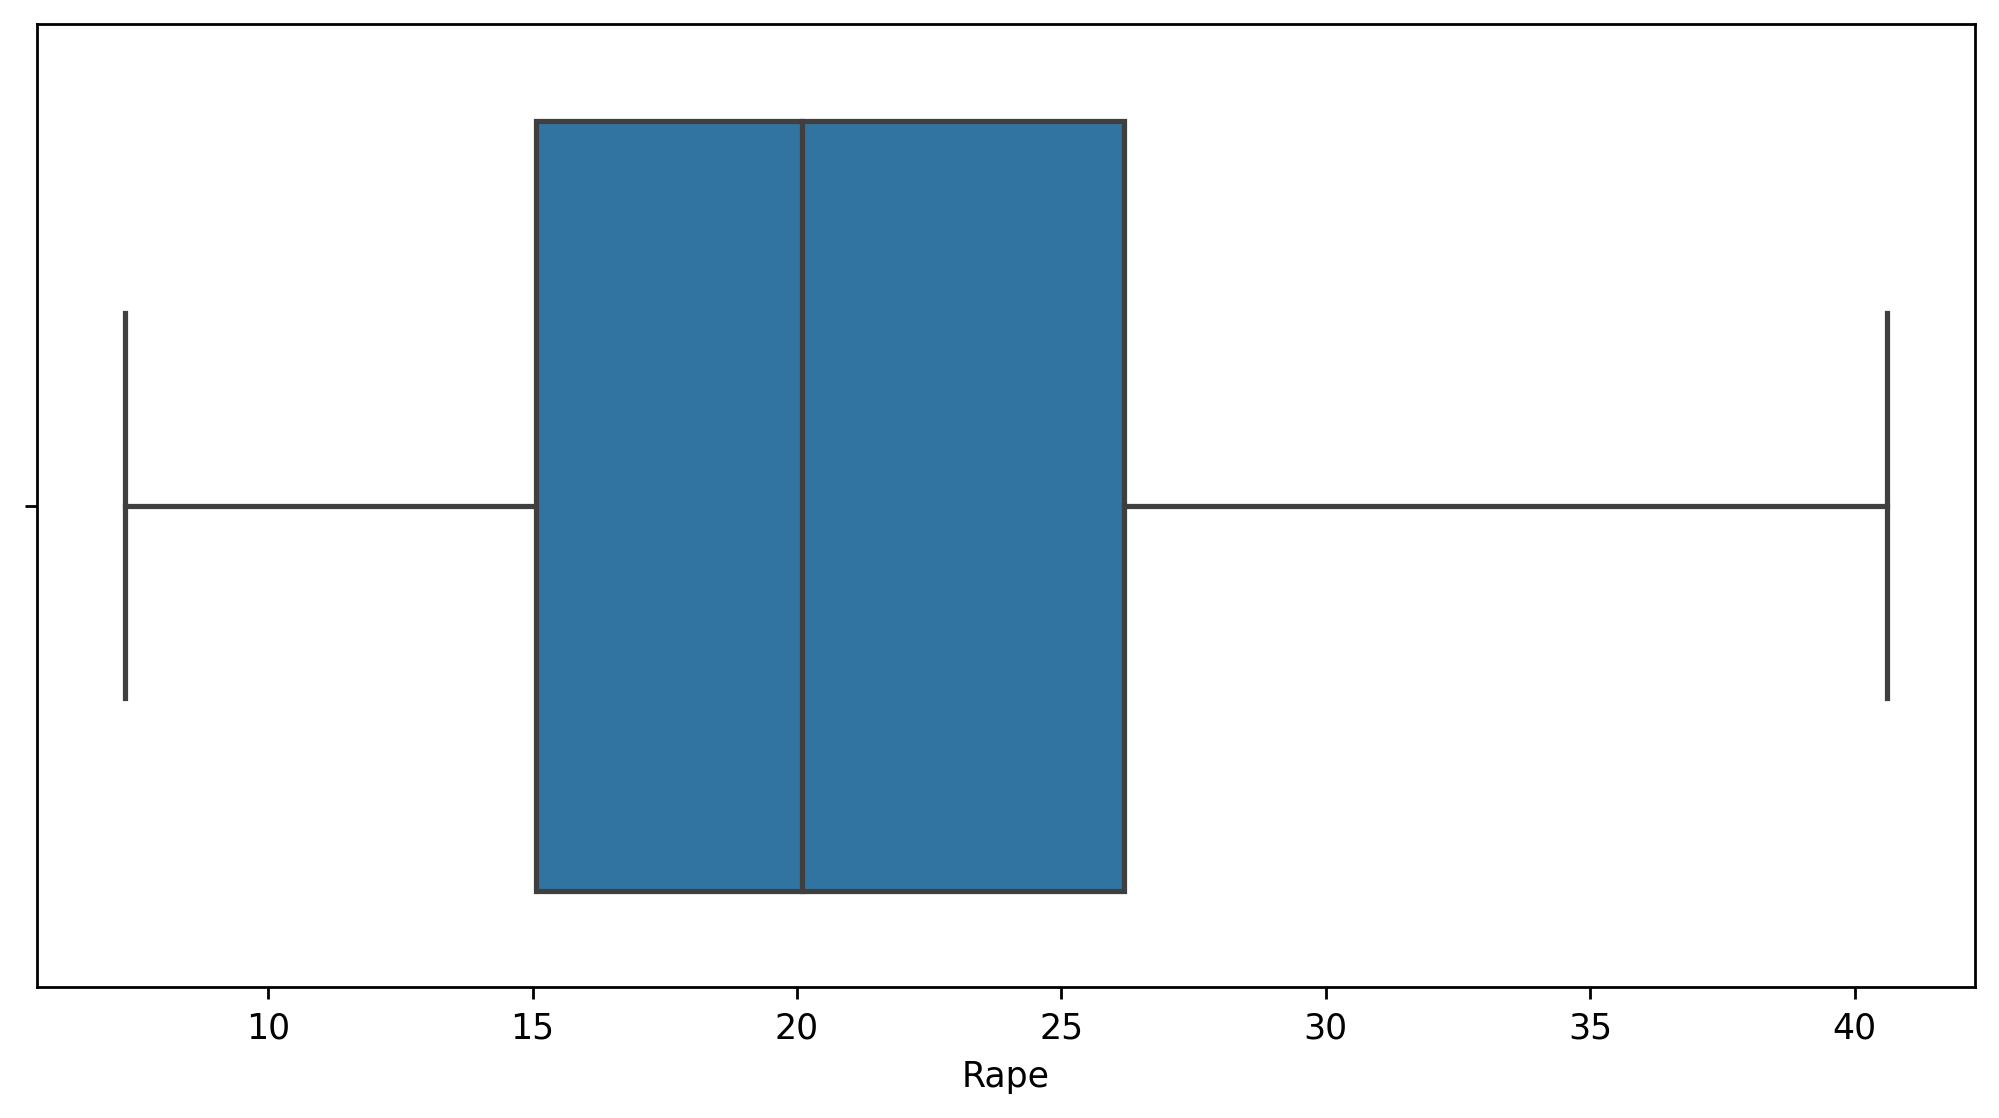

In [11]:
sns.boxplot(x = df['Rape'])

In [12]:
df.drop(columns=['places'],inplace=True)
df

Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  40.6
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        62  16.5
27    12.2      252        81  40.6
28     2.1       57        56   9.5
29     7.4      159        89  18.8
30    11.4      285        70  32.1
31    11.1      254        86  26.1
32    13.0      337        45  16.1
33     0.8       45        44   7.3
34     7.3      120        75  21.4
35     6.6      151        68  20.0
36     4.9      159        67  29.3
37     6.3      106        72  14.9
38     3.4      174        87   8.3
39    14.4      279        48  22.5
40     3.8       86        45  12.8
41    13.2      188        59  26.9
42    12.7      201        80  25.5
43     3.2      120        80  22.9
44     2.2       48        32  11.2
45     8.5      156        63  20.7
46     4.0      145        73  26.2
47     5.7       81        39   9.3
48     2.6       53        66  10.8
49     6.8      161        60  15.6

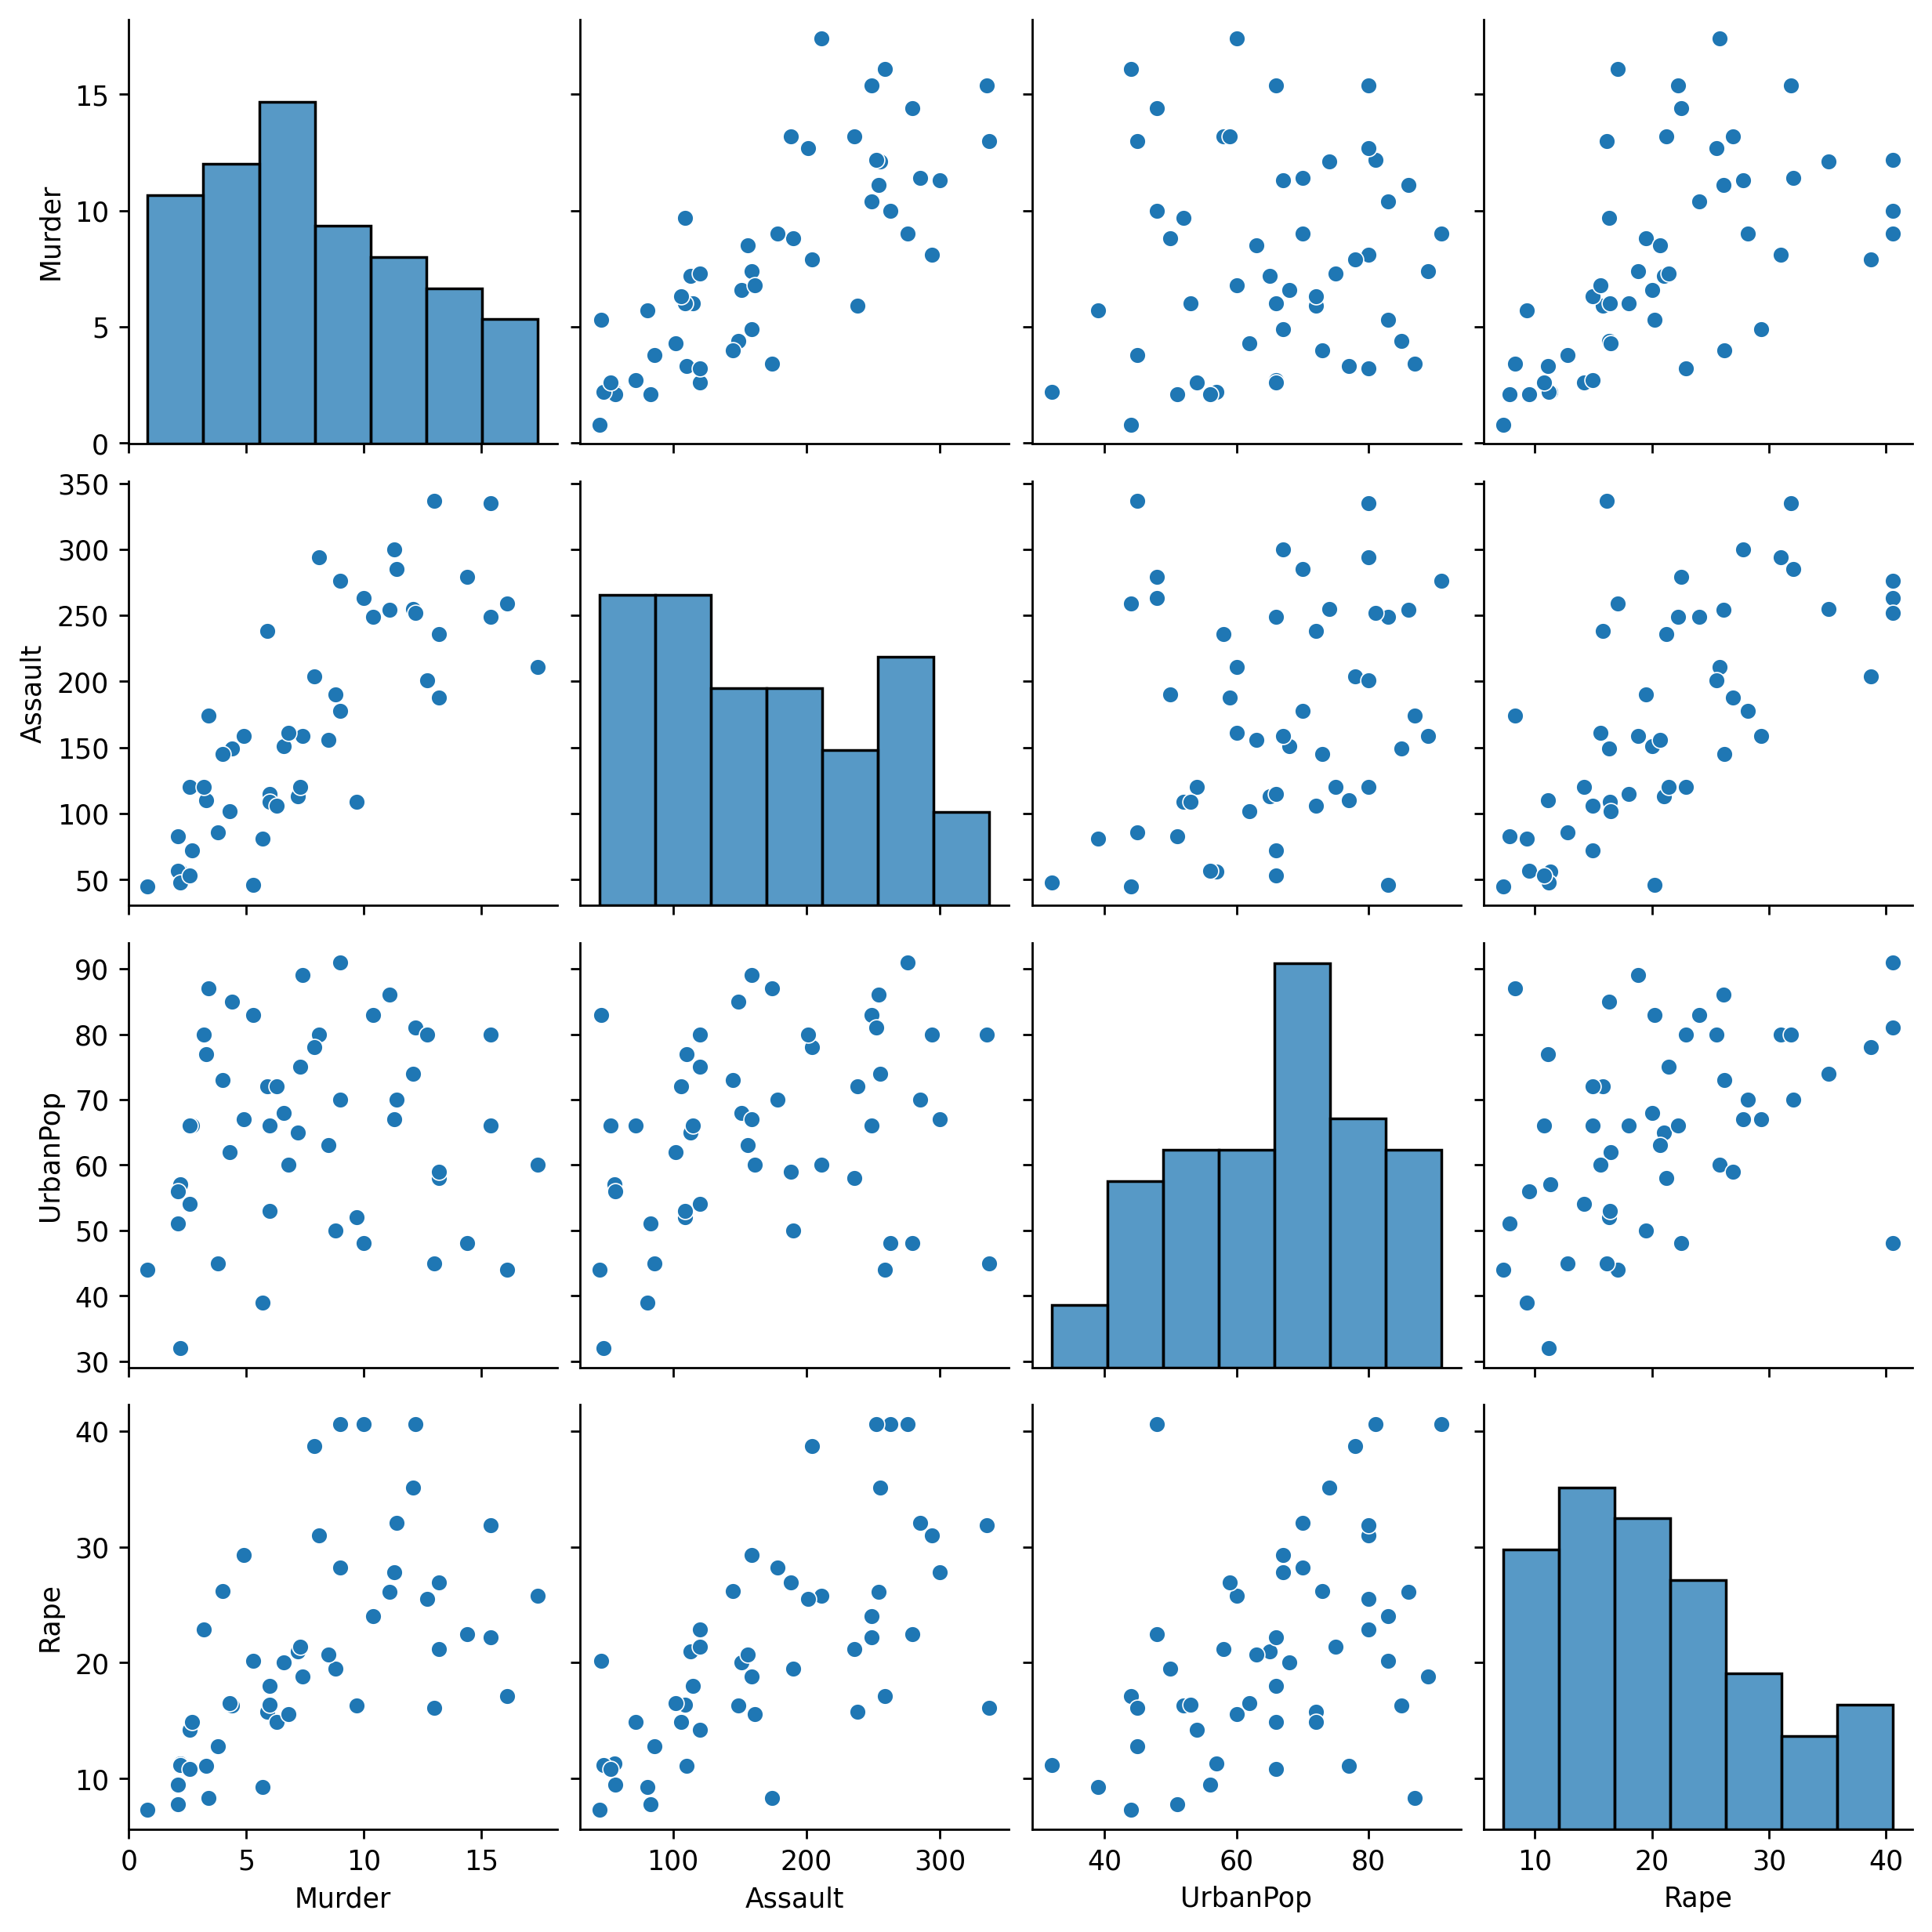

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.575206
Assault   0.801873  1.000000  0.258872  0.677166
UrbanPop  0.069573  0.258872  1.000000  0.429894
Rape      0.575206  0.677166  0.429894  1.000000

In [15]:
x = df[df.columns]
x

Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  40.6
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        62  16.5
27    12.2      252        81  40.6
28     2.1       57        56   9.5
29     7.4      159        89  18.8
30    11.4      285        70  32.1
31    11.1      254        86  26.1
32    13.0      337        45  16.1
33     0.8       45        44   7.3
34     7.3      120        75  21.4
35     6.6      151        68  20.0
36     4.9      159        67  29.3
37     6.3      106        72  14.9
38     3.4      174        87   8.3
39    14.4      279        48  22.5
40     3.8       86        45  12.8
41    13.2      188        59  26.9
42    12.7      201        80  25.5
43     3.2      120        80  22.9
44     2.2       48        32  11.2
45     8.5      156        63  20.7
46     4.0      145        73  26.2
47     5.7       81        39   9.3
48     2.6       53        66  10.8
49     6.8      161        60  15.6

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.01745412],
       [ 0.51301858,  1.11805959, -1.22406668,  2.21621945],
       [ 0.07236067,  1.49381682,  1.00912225,  1.12817063],
       [ 0.23470832,  0.23321191, -1.08449238, -0.1752212 ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.21621945],
       [ 0.02597562,  0.40290872,  0.86954794,  2.00087646],
       [-1.04088037, -0.73648418,  0.79976079, -1.12726392],
       [-0.43787481,  0.81502956,  0.45082502, -0.59457335],
       [ 1.76541475,  1.99078607,  1.00912225,  1.2301752 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.53881085],
       [-0.57702994, -1.51224105,  1.21848371, -0.0958843 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.77591482],
       [ 0.60578867,  0.94836277,  1.21848371,  0.33480169],
       [-0.13637203, -0.70012057, -0.03768506, -0.00521357],
       [-1.29599811, -1.39102904, -0.5959823 , -1.10459624],
       [-0.41468229, -0.67587817,  0.03210209, -0.34522883],
       [ 0.44344101, -0.

In [17]:
pd.DataFrame(x, columns= df.columns)

Murder   Assault  UrbanPop      Rape
0   1.255179  0.790787 -0.526195  0.017454
1   0.513019  1.118060 -1.224067  2.216219
2   0.072361  1.493817  1.009122  1.128171
3   0.234708  0.233212 -1.084492 -0.175221
4   0.281093  1.275635  1.776781  2.216219
5   0.025976  0.402909  0.869548  2.000876
6  -1.040880 -0.736484  0.799761 -1.127264
7  -0.437875  0.815030  0.450825 -0.594573
8   1.765415  1.990786  1.009122  1.230175
9   2.229265  0.487757 -0.386621  0.538811
10 -0.577030 -1.512241  1.218484 -0.095884
11 -1.203228 -0.615272 -0.805344 -0.775915
12  0.605789  0.948363  1.218484  0.334802
13 -0.136372 -0.700121 -0.037685 -0.005214
14 -1.295998 -1.391029 -0.595982 -1.104596
15 -0.414682 -0.675878  0.032102 -0.345229
16  0.443441 -0.748605 -0.944918 -0.537904
17  1.765415  0.948363  0.032102  0.130793
18 -1.319191 -1.063757 -1.014705 -1.501281
19  0.814521  1.566544  0.101889  0.765488
20 -0.785763 -0.263757  1.358058 -0.537904
21  1.000062  1.021090  0.590399  1.592858
22 -1.180036 -1.197090  0.032102 -0.696578
23  1.927762  1.069575 -1.503215 -0.447233
24  0.281093  0.087757  0.311251  0.810823
25 -0.414682 -0.748605 -0.875131 -0.526570
26 -0.808955 -0.833454 -0.247047 -0.515236
27  1.023254  0.984726  1.078909  2.216219
28 -1.319191 -1.378908 -0.665769 -1.308605
29 -0.089987 -0.142545  1.637207 -0.254558
30  0.837714  1.384726  0.311251  1.252843
31  0.768136  1.008969  1.427845  0.572812
32  1.208794  2.015028 -1.433428 -0.560572
33 -1.620693 -1.524362 -1.503215 -1.557950
34 -0.113180 -0.615272  0.660186  0.040122
35 -0.275527 -0.239515  0.171676 -0.118552
36 -0.669800 -0.142545  0.101889  0.935495
37 -0.345105 -0.784969  0.450825 -0.696578
38 -1.017688  0.039273  1.497632 -1.444611
39  1.533490  1.311999 -1.224067  0.164794
40 -0.924918 -1.027393 -1.433428 -0.934589
41  1.255179  0.208970 -0.456408  0.663483
42  1.139217  0.366545  1.009122  0.504809
43 -1.064073 -0.615272  1.009122  0.210129
44 -1.295998 -1.487999 -2.340661 -1.115930
45  0.165131 -0.178909 -0.177259 -0.039215
46 -0.878533 -0.312242  0.520612  0.584146
47 -0.484260 -1.087999 -1.852151 -1.331273
48 -1.203228 -1.427393  0.032102 -1.161265
49 -0.229142 -0.118303 -0.386621 -0.617241

In [18]:
#Hierarchical clustering

In [19]:
from scipy.cluster import hierarchy

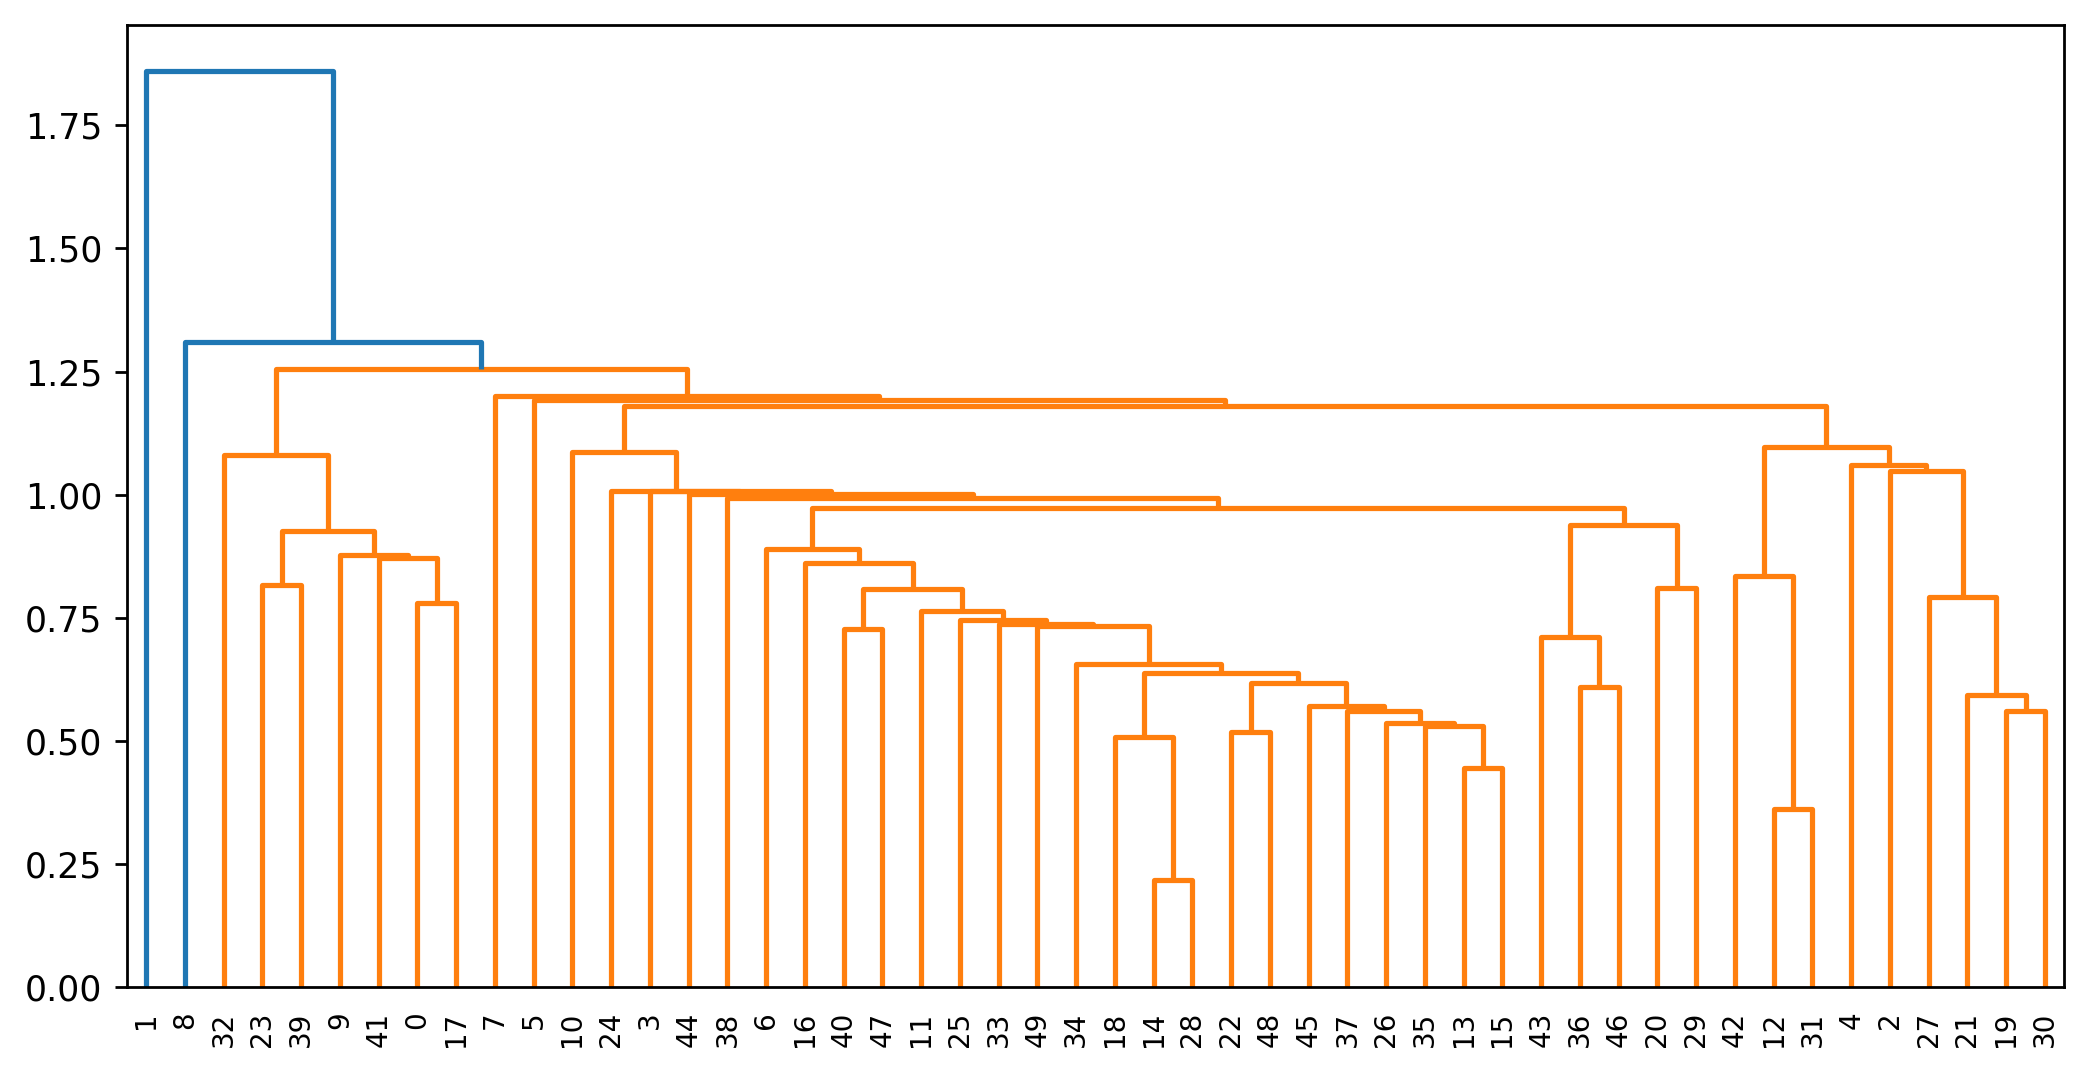

In [20]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

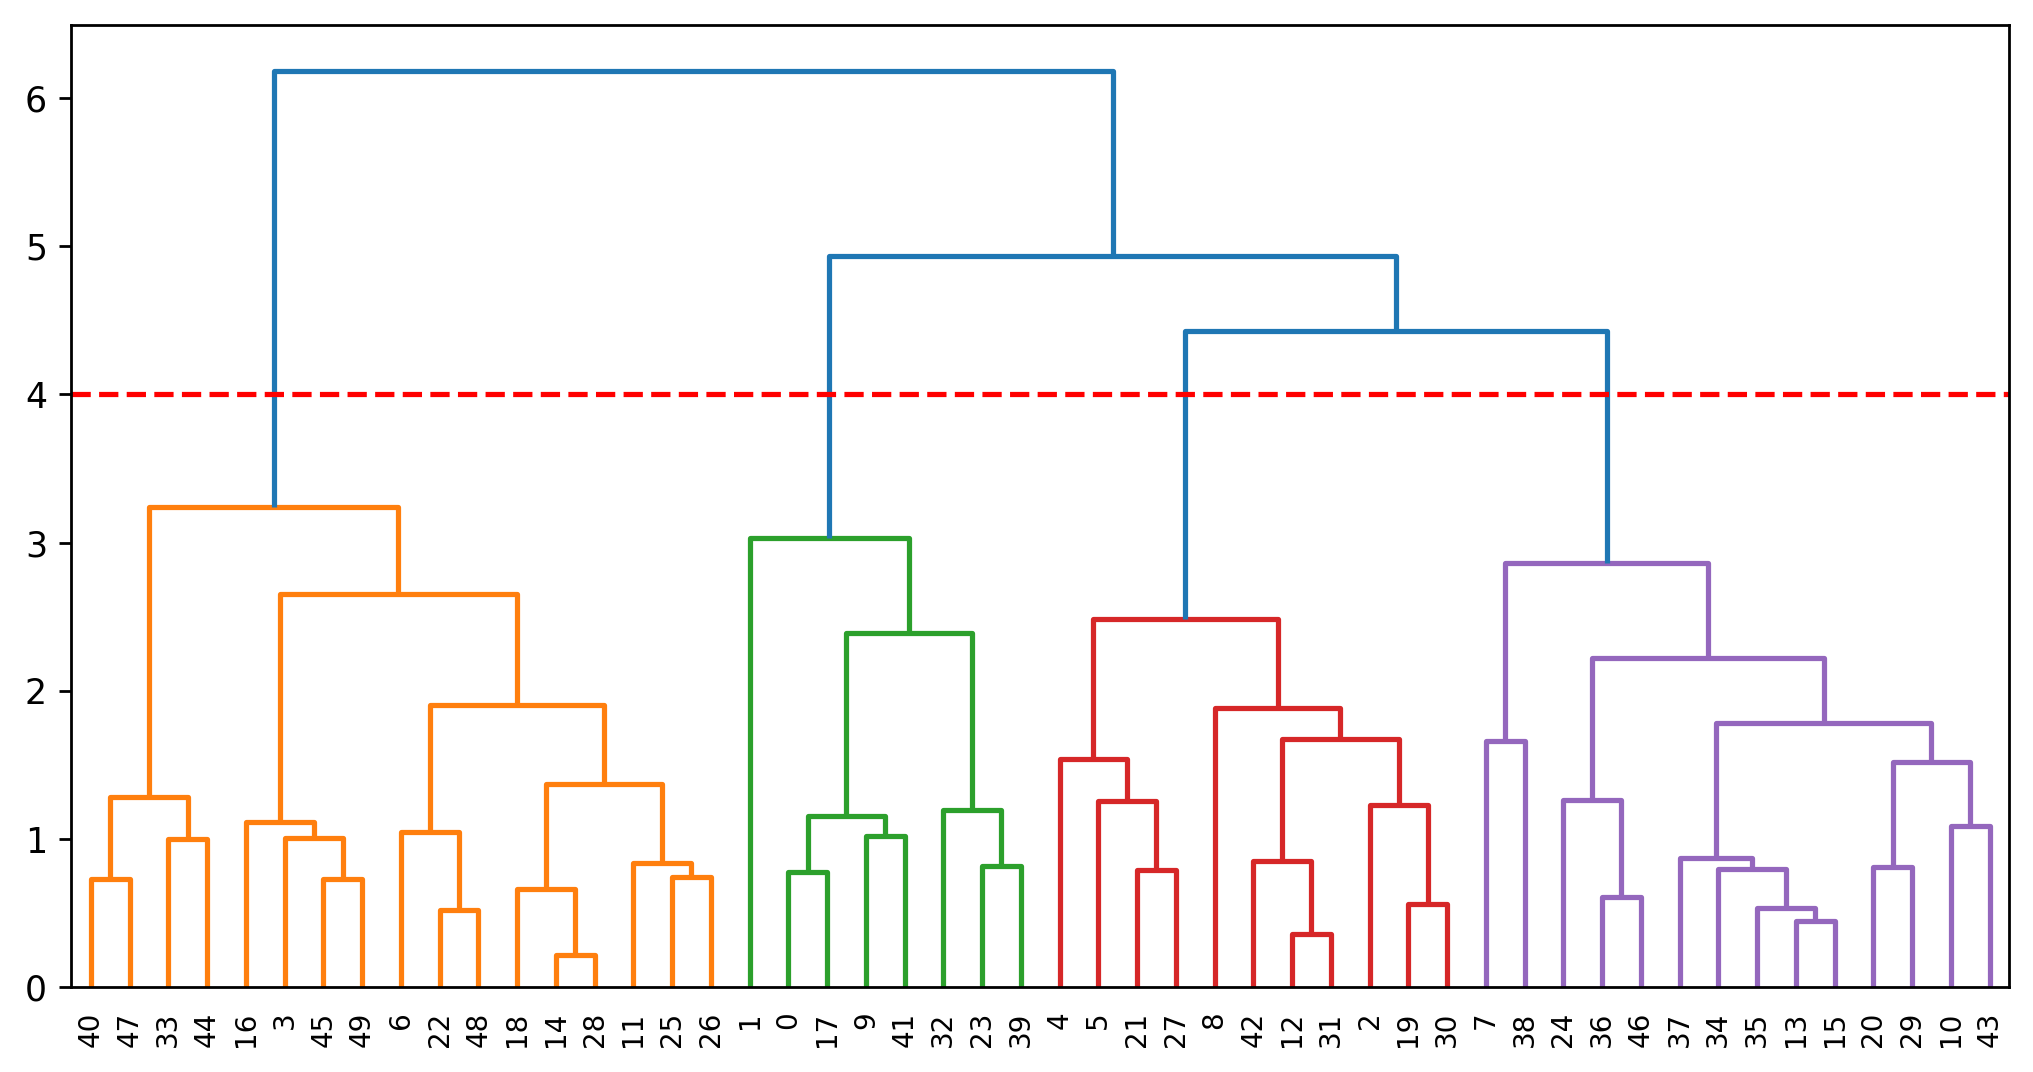

In [21]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4, linestyle = '--', color = 'red')

# Model Building

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(x)
ypred

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [24]:
df['cluster'] = ypred 
df

Murder  Assault  UrbanPop  Rape  cluster
0     13.2      236        58  21.2        3
1     10.0      263        48  40.6        1
2      8.1      294        80  31.0        1
3      8.8      190        50  19.5        0
4      9.0      276        91  40.6        1
5      7.9      204        78  38.7        1
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
8     15.4      335        80  31.9        1
9     17.4      211        60  25.8        3
10     5.3       46        83  20.2        0
11     2.6      120        54  14.2        2
12    10.4      249        83  24.0        1
13     7.2      113        65  21.0        0
14     2.2       56        57  11.3        2
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        0
17    15.4      249        66  22.2        3
18     2.1       83        51   7.8        2
19    11.3      300        67  27.8        1
20     4.4      149        85  16.3        0
21    12.1      255        74  35.1        1
22     2.7       72        66  14.9        2
23    16.1      259        44  17.1        3
24     9.0      178        70  28.2        0
25     6.0      109        53  16.4        2
26     4.3      102        62  16.5        2
27    12.2      252        81  40.6        1
28     2.1       57        56   9.5        2
29     7.4      159        89  18.8        0
30    11.4      285        70  32.1        1
31    11.1      254        86  26.1        1
32    13.0      337        45  16.1        3
33     0.8       45        44   7.3        2
34     7.3      120        75  21.4        0
35     6.6      151        68  20.0        0
36     4.9      159        67  29.3        0
37     6.3      106        72  14.9        0
38     3.4      174        87   8.3        0
39    14.4      279        48  22.5        3
40     3.8       86        45  12.8        2
41    13.2      188        59  26.9        3
42    12.7      201        80  25.5        1
43     3.2      120        80  22.9        0
44     2.2       48        32  11.2        2
45     8.5      156        63  20.7        0
46     4.0      145        73  26.2        0
47     5.7       81        39   9.3        2
48     2.6       53        66  10.8        2
49     6.8      161        60  15.6        0

In [25]:
#Analyzing the clusters
df[df['cluster'] == 0] 

Murder  Assault  UrbanPop  Rape  cluster
3      8.8      190        50  19.5        0
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
10     5.3       46        83  20.2        0
13     7.2      113        65  21.0        0
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        0
20     4.4      149        85  16.3        0
24     9.0      178        70  28.2        0
29     7.4      159        89  18.8        0
34     7.3      120        75  21.4        0
35     6.6      151        68  20.0        0
36     4.9      159        67  29.3        0
37     6.3      106        72  14.9        0
38     3.4      174        87   8.3        0
43     3.2      120        80  22.9        0
45     8.5      156        63  20.7        0
46     4.0      145        73  26.2        0
49     6.8      161        60  15.6        0

In [26]:
df[df['cluster'] == 1] 

Murder  Assault  UrbanPop  Rape  cluster
1     10.0      263        48  40.6        1
2      8.1      294        80  31.0        1
4      9.0      276        91  40.6        1
5      7.9      204        78  38.7        1
8     15.4      335        80  31.9        1
12    10.4      249        83  24.0        1
19    11.3      300        67  27.8        1
21    12.1      255        74  35.1        1
27    12.2      252        81  40.6        1
30    11.4      285        70  32.1        1
31    11.1      254        86  26.1        1
42    12.7      201        80  25.5        1

In [27]:
df[df['cluster'] == 2] 

Murder  Assault  UrbanPop  Rape  cluster
11     2.6      120        54  14.2        2
14     2.2       56        57  11.3        2
18     2.1       83        51   7.8        2
22     2.7       72        66  14.9        2
25     6.0      109        53  16.4        2
26     4.3      102        62  16.5        2
28     2.1       57        56   9.5        2
33     0.8       45        44   7.3        2
40     3.8       86        45  12.8        2
44     2.2       48        32  11.2        2
47     5.7       81        39   9.3        2
48     2.6       53        66  10.8        2

In [28]:
df[df['cluster'] == 3] 

Murder  Assault  UrbanPop  Rape  cluster
0     13.2      236        58  21.2        3
9     17.4      211        60  25.8        3
17    15.4      249        66  22.2        3
23    16.1      259        44  17.1        3
32    13.0      337        45  16.1        3
39    14.4      279        48  22.5        3
41    13.2      188        59  26.9        3

In [29]:
df.groupby('cluster').agg('mean')

Murder     Assault   UrbanPop       Rape
cluster                                             
0         6.210526  142.052632  71.263158  19.184211
1        10.966667  264.000000  76.500000  32.833333
2         3.091667   76.000000  52.083333  11.833333
3        14.671429  251.285714  54.285714  21.685714

In [30]:
'''
Cluster 0: This cluster has relatively low average values for Murder (6.21), Assault (142.05), UrbanPop (71.26), and Rape (19.18) compared to other clusters. 
            It may represent areas with moderate levels of crime and population density.
Cluster 1: This cluster has high average values for Murder (10.97), Assault (264.00), and Rape (32.83), but a slightly higher average value for UrbanPop (76.50) compared to Cluster 0. 
            This cluster may represent areas with high crime rates and high population density.
Cluster 2: This cluster has the lowest average values for Murder (3.09), Assault (76.00), UrbanPop (52.08), and Rape (11.83) among all clusters. 
            It may represent areas with relatively low crime rates and lower population density.
Cluster 3: This cluster has high average values for Murder (14.67) and Assault (251.29), but lower values for UrbanPop (54.29) and Rape (21.69) compared to Cluster 1. 
            It may represent areas with high crime rates but lower population density compared to Cluster 1.
'''

'\nCluster 0: This cluster has relatively low average values for Murder (6.21), Assault (142.05), UrbanPop (71.26), and Rape (19.18) compared to other clusters. \n            It may represent areas with moderate levels of crime and population density.\nCluster 1: This cluster has high average values for Murder (10.97), Assault (264.00), and Rape (32.83), but a slightly higher average value for UrbanPop (76.50) compared to Cluster 0. \n            This cluster may represent areas with high crime rates and high population density.\nCluster 2: This cluster has the lowest average values for Murder (3.09), Assault (76.00), UrbanPop (52.08), and Rape (11.83) among all clusters. \n            It may represent areas with relatively low crime rates and lower population density.\nCluster 3: This cluster has high average values for Murder (14.67) and Assault (251.29), but lower values for UrbanPop (54.29) and Rape (21.69) compared to Cluster 1. \n            It may represent areas with high crime

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

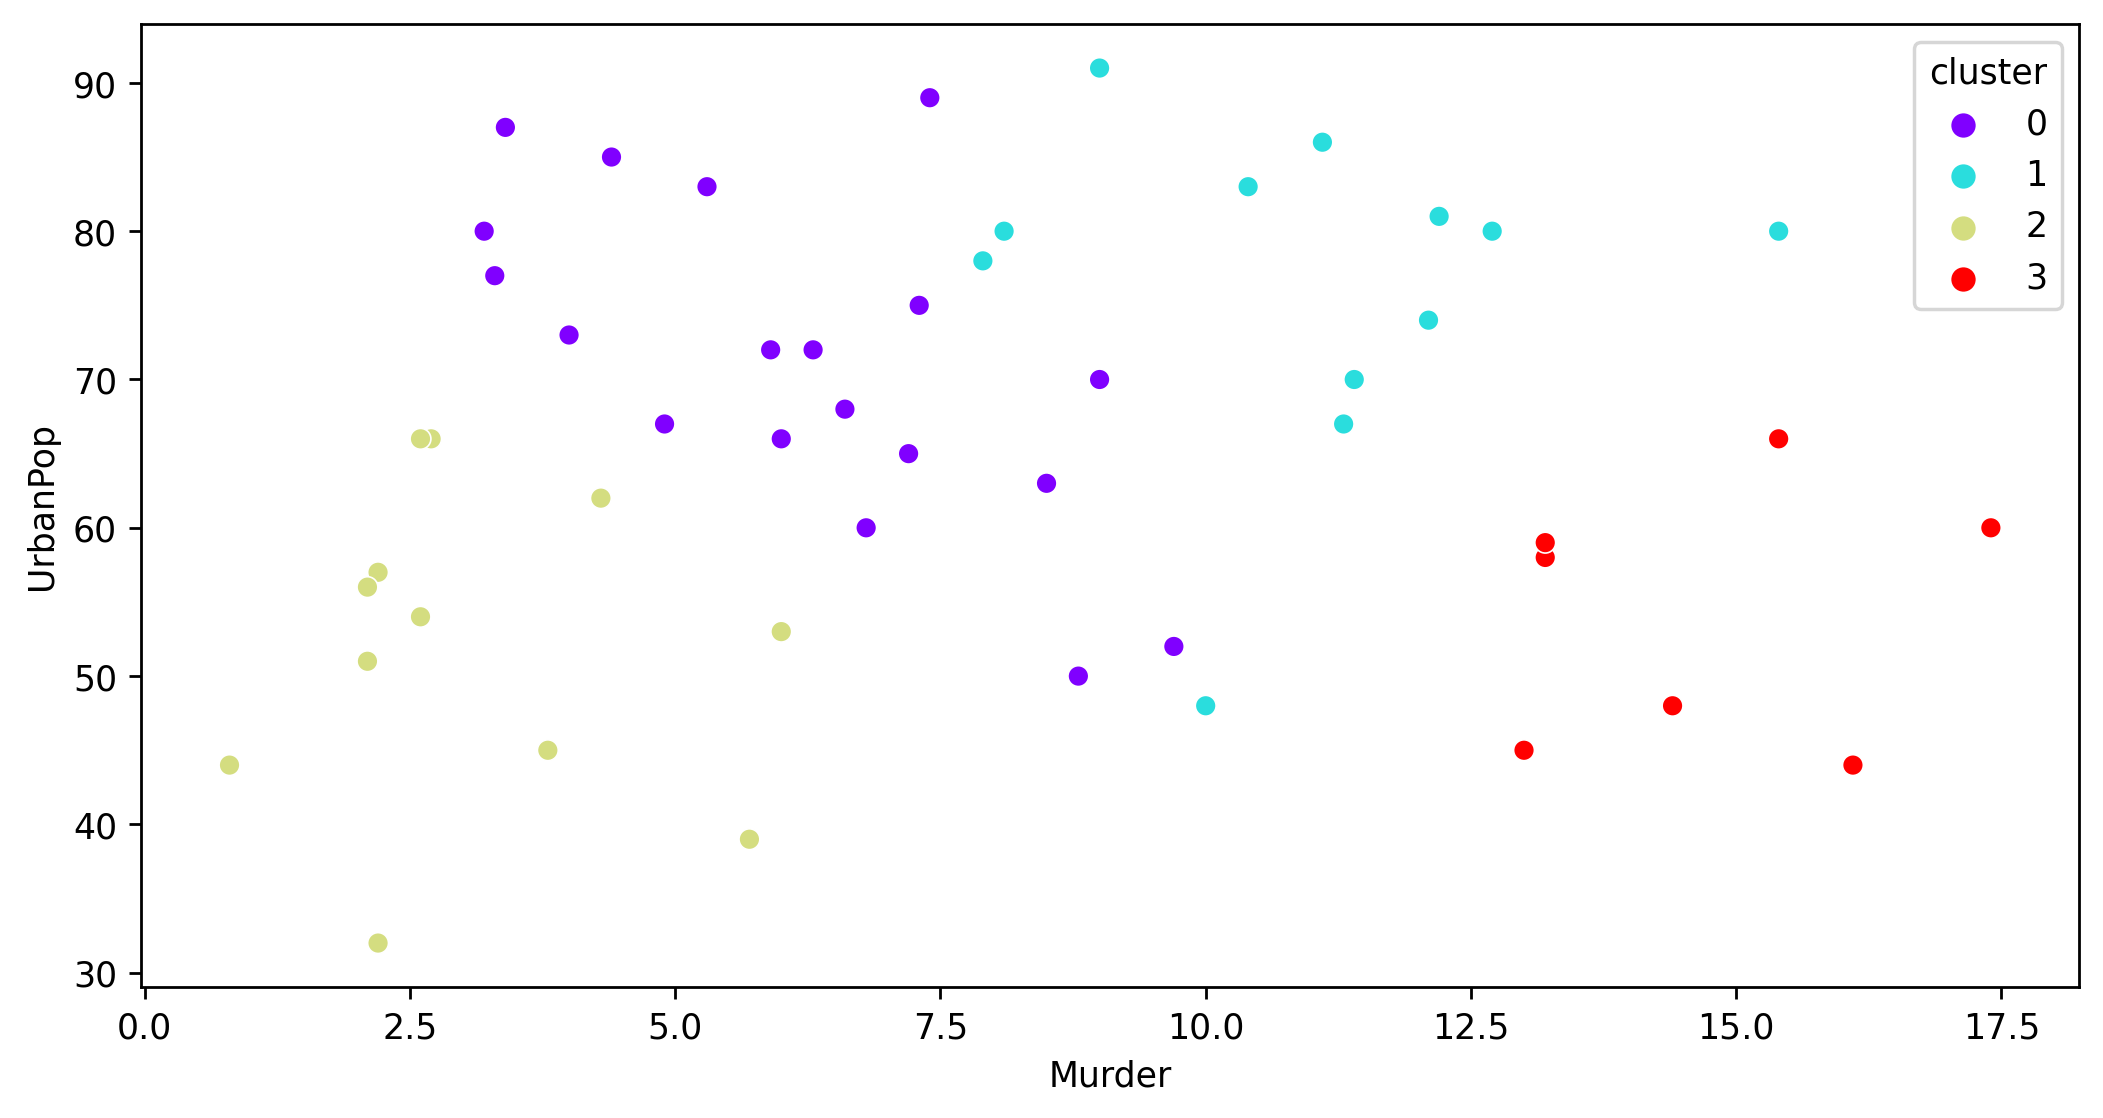

In [31]:
sns.scatterplot(x = df['Murder'],y=  df['UrbanPop'], hue=df['cluster'], palette='rainbow')

In [32]:
#Silhouette score

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred) 

0.3380882558825959

In [34]:
#Hierarchical clustering does not give any proper way to find out no. of clusters.

# K-mean

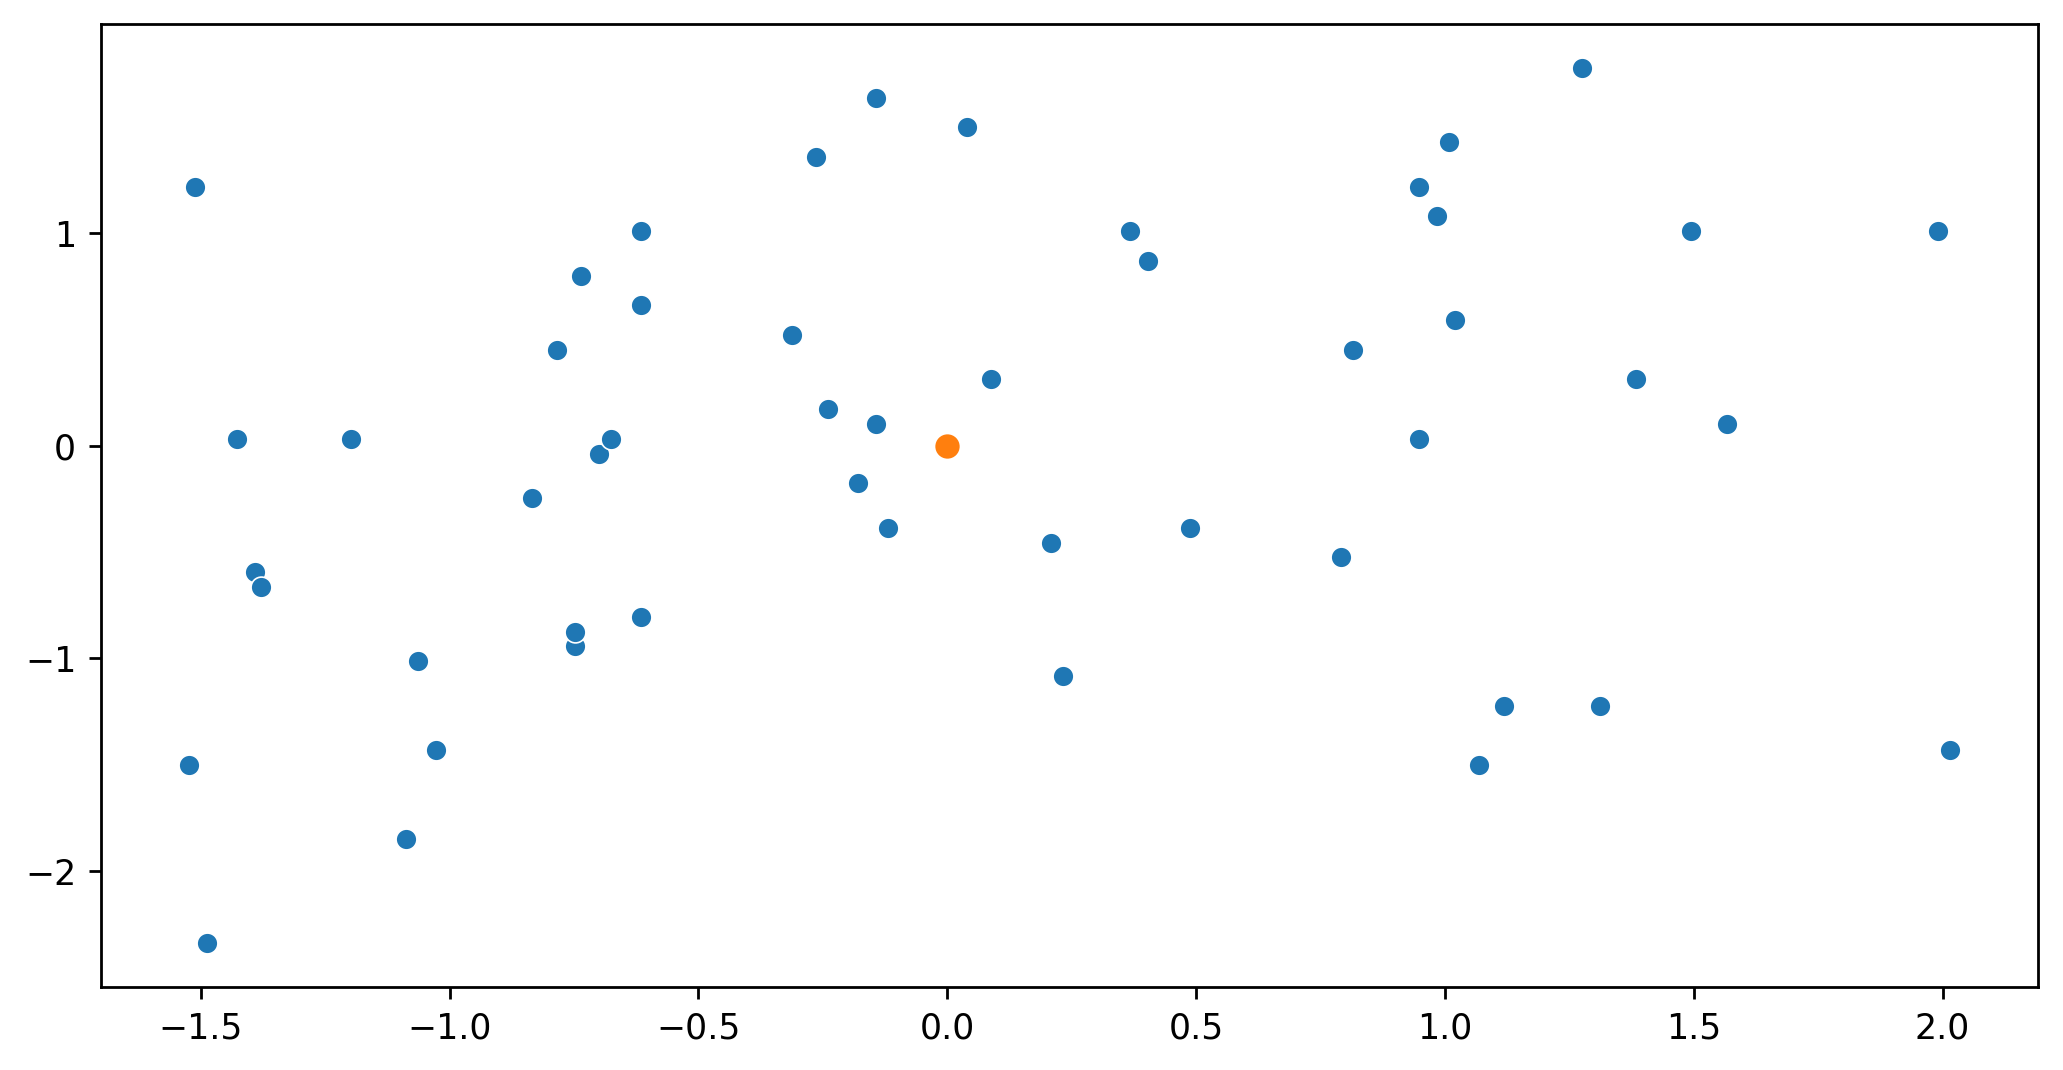

In [35]:
sns.scatterplot(x = x[:,1], y = x[:,2])
plt.scatter(x[:,1].mean(),x[:,1].mean())

In [36]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans()
yp = km.fit_predict(x) 
yp

array([5, 6, 1, 3, 6, 6, 2, 2, 1, 5, 7, 4, 1, 7, 4, 7, 3, 5, 4, 1, 2, 6,
       4, 5, 7, 3, 4, 6, 4, 2, 1, 1, 5, 0, 7, 7, 7, 7, 2, 5, 0, 5, 1, 7,
       0, 3, 7, 0, 4, 3])

In [38]:
km.cluster_centers_

array([[-1.08146728, -1.28193823, -1.78236392, -1.23493542],
       [ 0.85759319,  1.2513928 ,  0.86954794,  0.82701426],
       [-0.67443853, -0.05769692,  1.14869656, -0.7917822 ],
       [ 0.03989114, -0.31224214, -0.69368431, -0.37923035],
       [-1.18997515, -1.12955741, -0.46637758, -1.00906814],
       [ 1.59644066,  0.97606837, -0.78540457,  0.07250421],
       [ 0.56868063,  0.96048397,  0.61831419,  2.04847859],
       [-0.41932079, -0.5510298 ,  0.4438463 ,  0.13192592]])

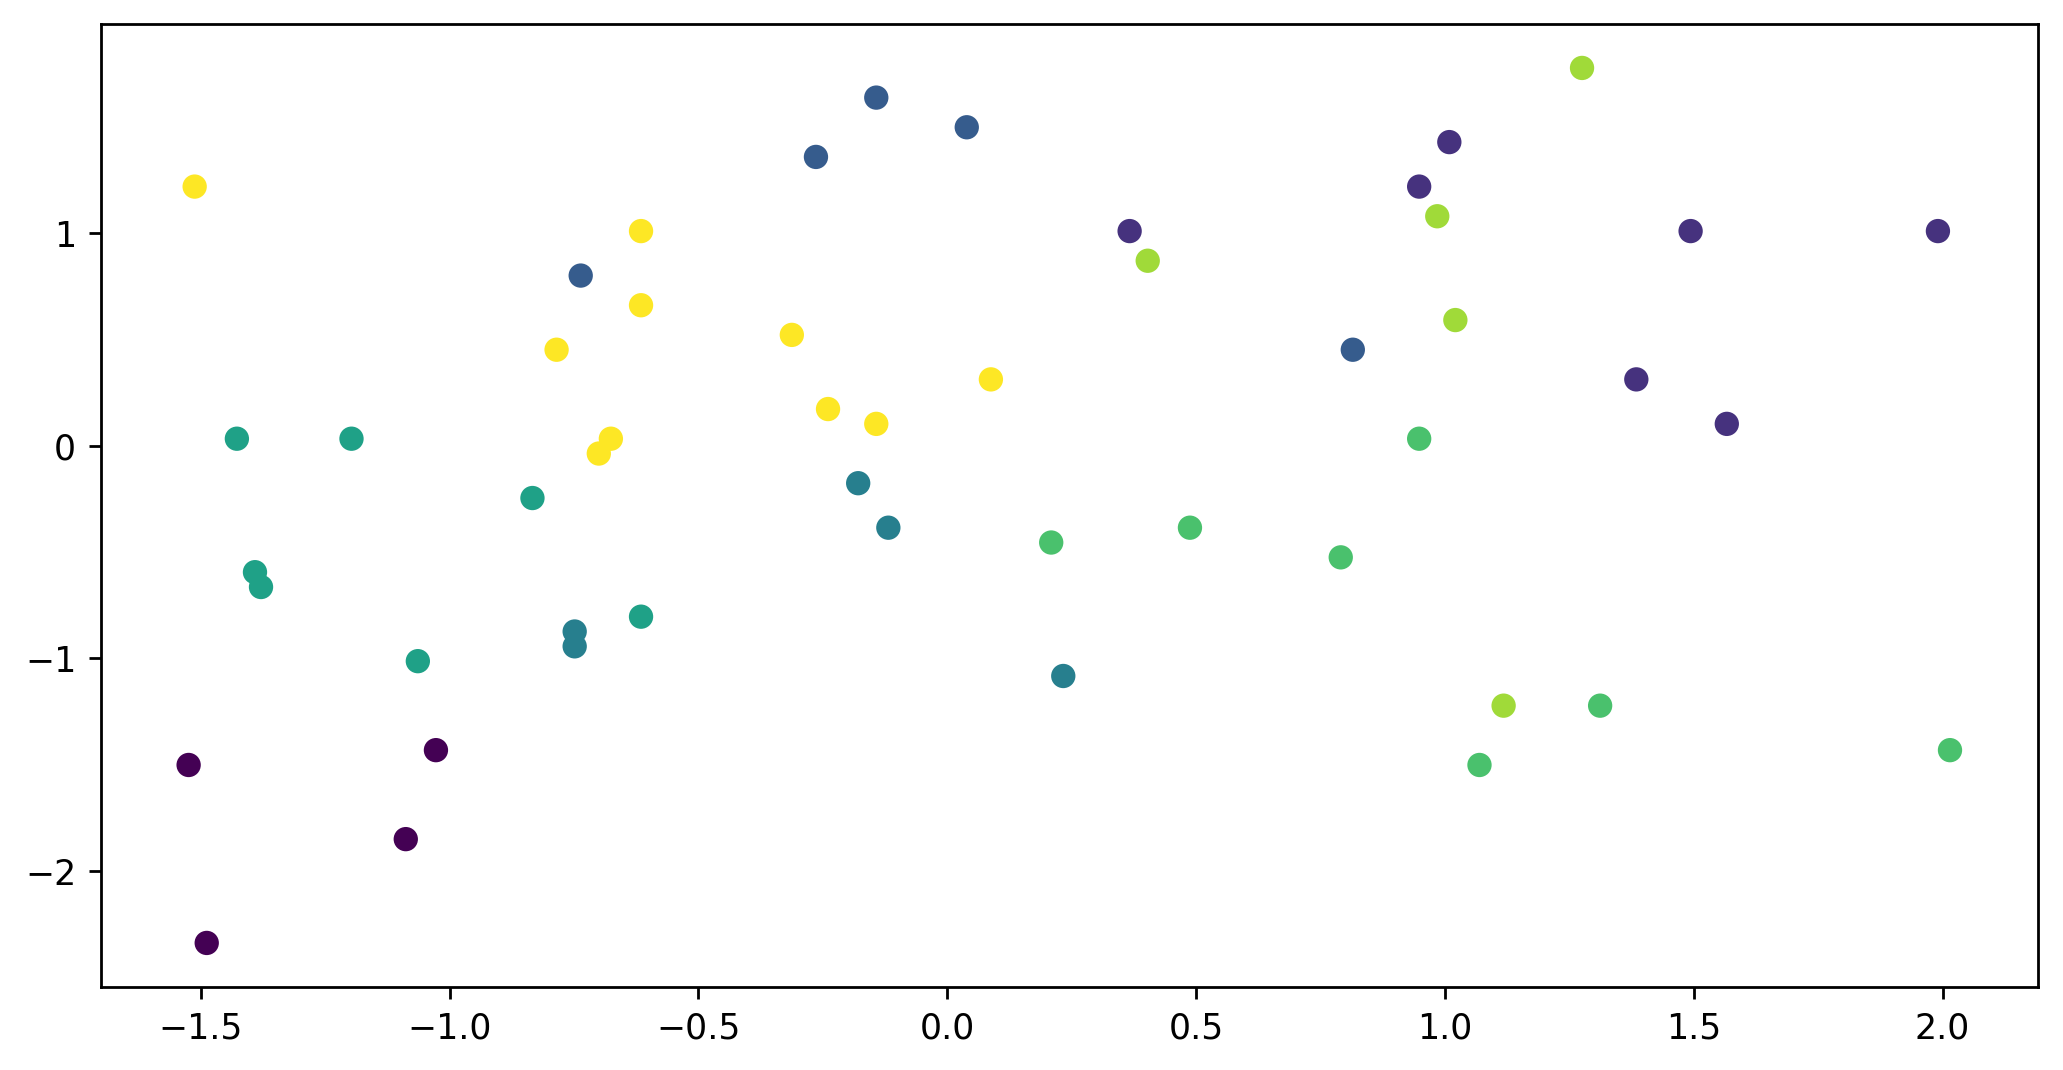

In [39]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='viridis')

In [40]:
km.inertia_  

35.687480155909874

In [41]:
#Elbow graph

In [42]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
wcss

[200.0,
 104.2765231547076,
 78.99694102171597,
 56.67929407952749,
 49.00510173285439,
 43.92901713990515,
 39.737102686468695,
 36.59758339170288,
 32.443448722106616,
 28.92345979728791]

Text(0.5, 1.0, 'Elbow Graph')

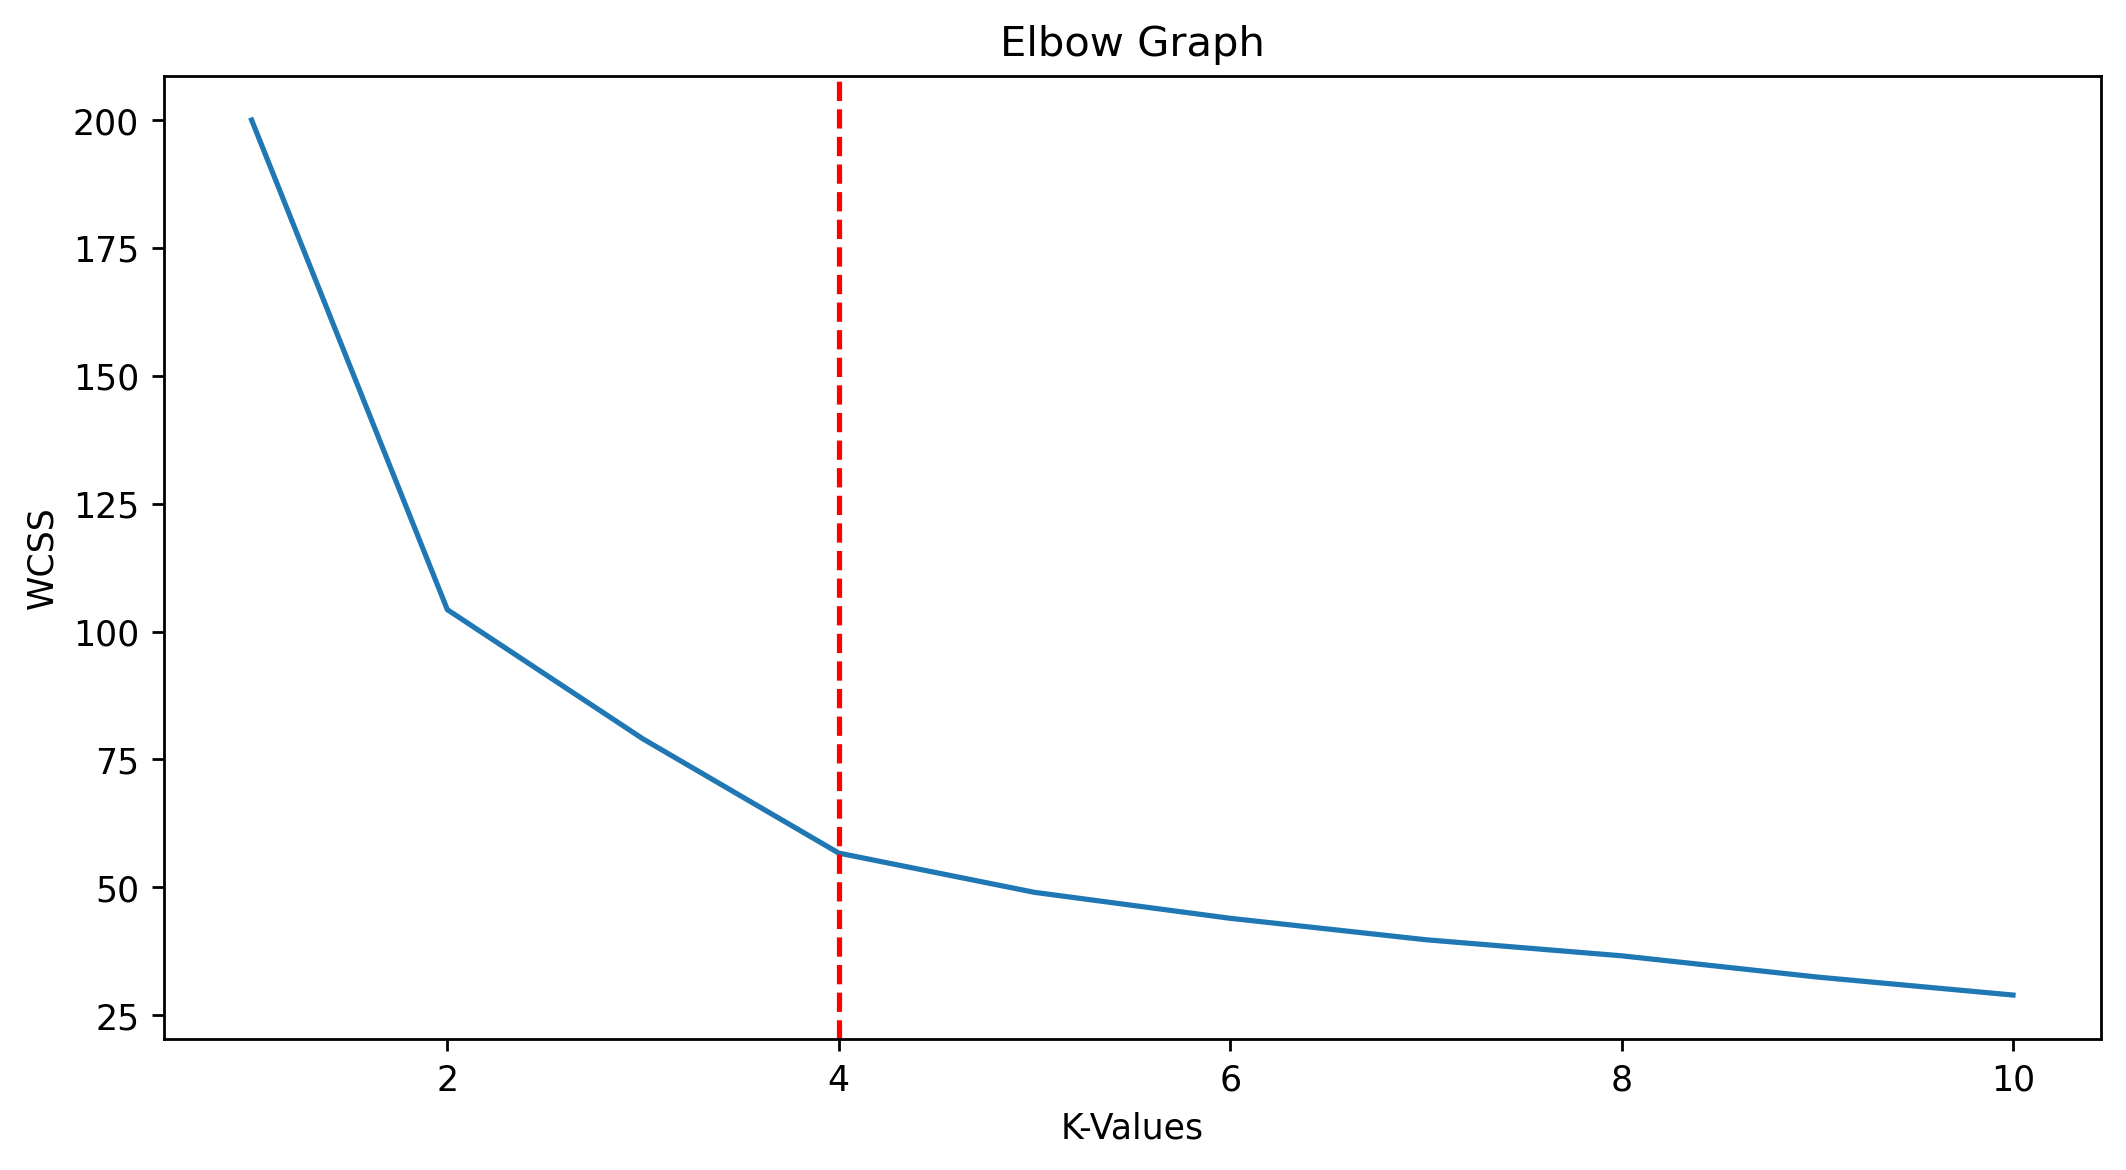

In [43]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [44]:
#Final Model
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [45]:
#Visualize the clusters

In [46]:
km.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -1.00520716],
       [ 0.70212683,  1.04999438,  0.72997363,  1.29556275],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.25668319],
       [ 1.42622412,  0.88321132, -0.82279055,  0.04153853]])

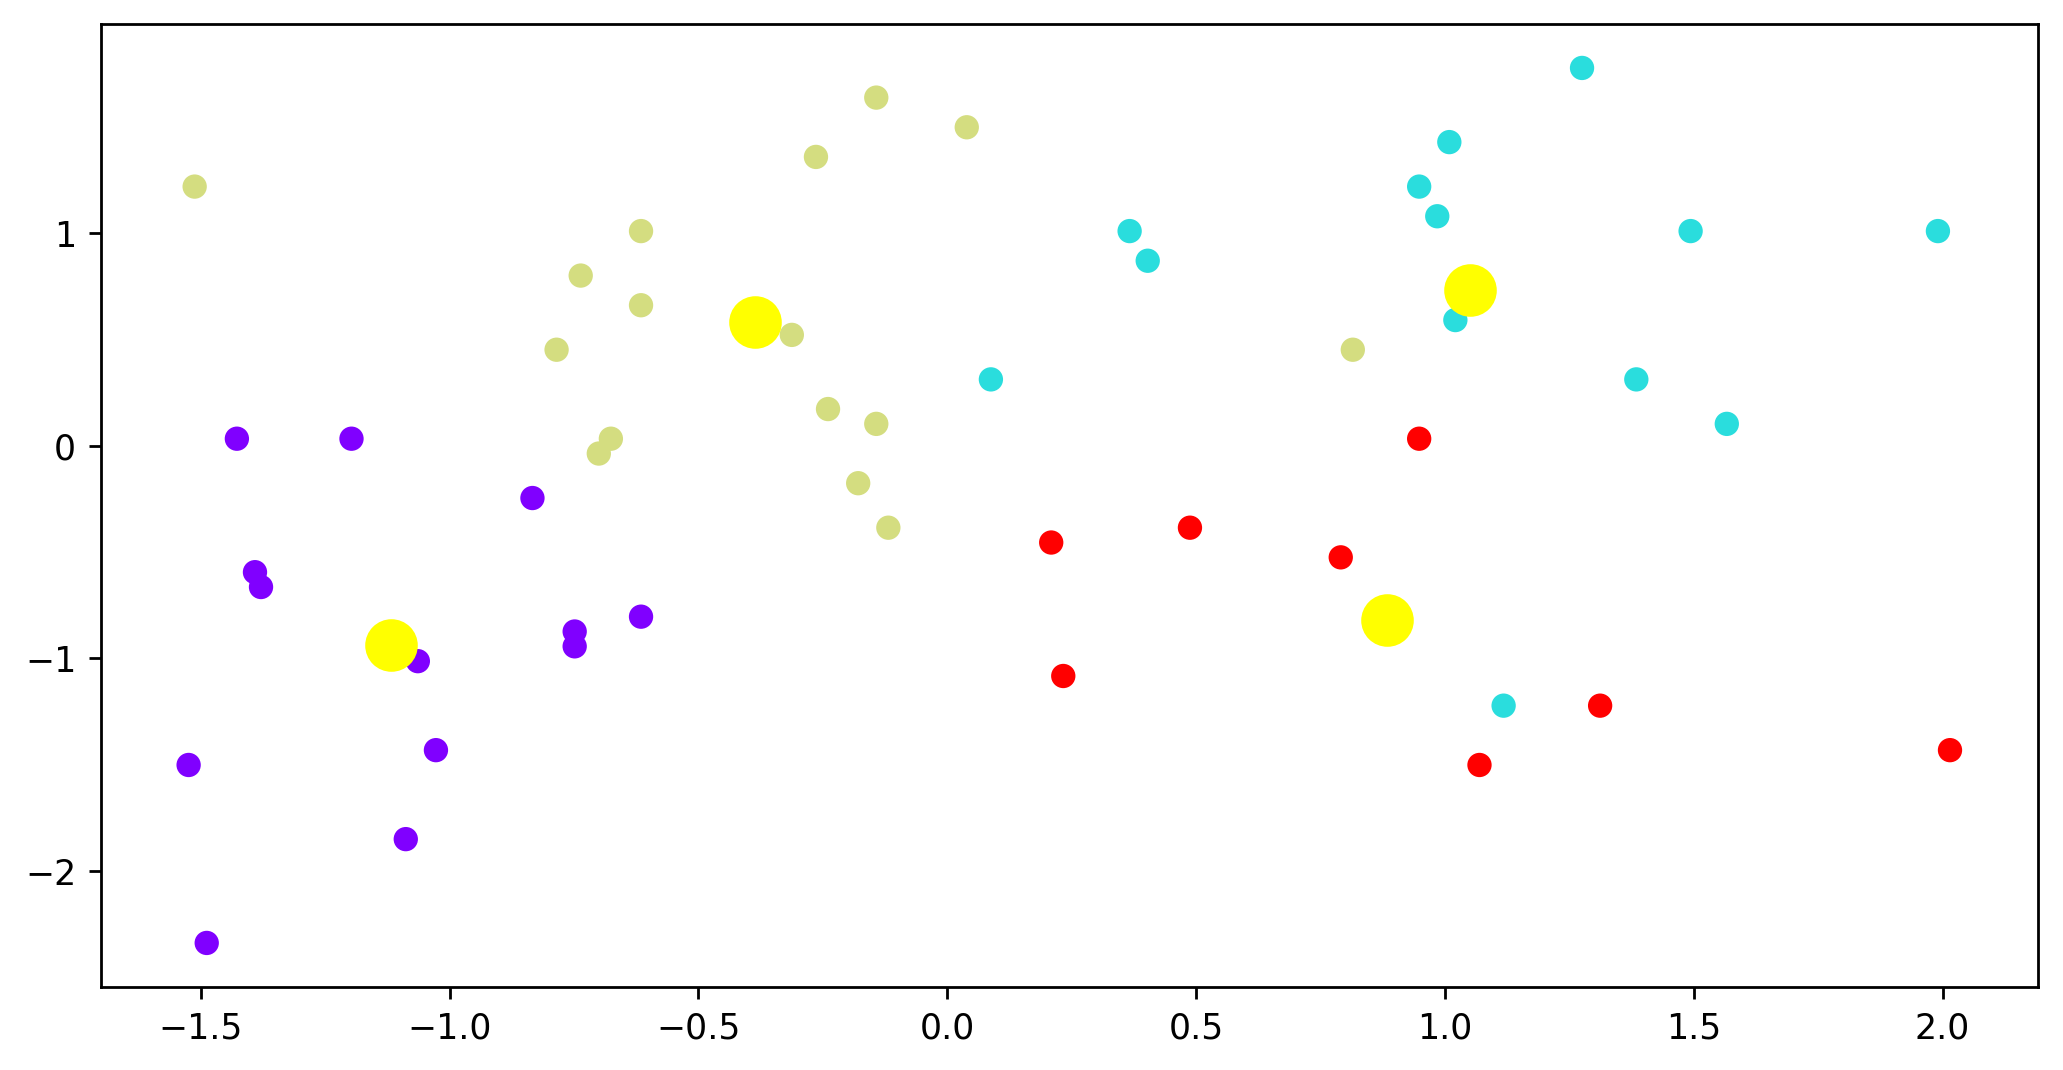

In [47]:
plt.scatter(x[:,1],x[:,2], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2], c = 'yellow',s = 200)

In [48]:
km.inertia_

56.67929407952749

In [49]:
#Evaluation of Kmeans

In [50]:
#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred) 

0.34213885348474465

In [51]:
#Analyzing clusters
df['cluster'] = ypred
df

Murder  Assault  UrbanPop  Rape  cluster
0     13.2      236        58  21.2        3
1     10.0      263        48  40.6        1
2      8.1      294        80  31.0        1
3      8.8      190        50  19.5        3
4      9.0      276        91  40.6        1
5      7.9      204        78  38.7        1
6      3.3      110        77  11.1        2
7      5.9      238        72  15.8        2
8     15.4      335        80  31.9        1
9     17.4      211        60  25.8        3
10     5.3       46        83  20.2        2
11     2.6      120        54  14.2        0
12    10.4      249        83  24.0        1
13     7.2      113        65  21.0        2
14     2.2       56        57  11.3        0
15     6.0      115        66  18.0        2
16     9.7      109        52  16.3        0
17    15.4      249        66  22.2        3
18     2.1       83        51   7.8        0
19    11.3      300        67  27.8        1
20     4.4      149        85  16.3        2
21    12.1      255        74  35.1        1
22     2.7       72        66  14.9        0
23    16.1      259        44  17.1        3
24     9.0      178        70  28.2        1
25     6.0      109        53  16.4        0
26     4.3      102        62  16.5        0
27    12.2      252        81  40.6        1
28     2.1       57        56   9.5        0
29     7.4      159        89  18.8        2
30    11.4      285        70  32.1        1
31    11.1      254        86  26.1        1
32    13.0      337        45  16.1        3
33     0.8       45        44   7.3        0
34     7.3      120        75  21.4        2
35     6.6      151        68  20.0        2
36     4.9      159        67  29.3        2
37     6.3      106        72  14.9        2
38     3.4      174        87   8.3        2
39    14.4      279        48  22.5        3
40     3.8       86        45  12.8        0
41    13.2      188        59  26.9        3
42    12.7      201        80  25.5        1
43     3.2      120        80  22.9        2
44     2.2       48        32  11.2        0
45     8.5      156        63  20.7        2
46     4.0      145        73  26.2        2
47     5.7       81        39   9.3        0
48     2.6       53        66  10.8        0
49     6.8      161        60  15.6        2

In [52]:
df[df['cluster']==0]

Murder  Assault  UrbanPop  Rape  cluster
11     2.6      120        54  14.2        0
14     2.2       56        57  11.3        0
16     9.7      109        52  16.3        0
18     2.1       83        51   7.8        0
22     2.7       72        66  14.9        0
25     6.0      109        53  16.4        0
26     4.3      102        62  16.5        0
28     2.1       57        56   9.5        0
33     0.8       45        44   7.3        0
40     3.8       86        45  12.8        0
44     2.2       48        32  11.2        0
47     5.7       81        39   9.3        0
48     2.6       53        66  10.8        0

In [53]:
df[df['cluster'] == 1] 

Murder  Assault  UrbanPop  Rape  cluster
1     10.0      263        48  40.6        1
2      8.1      294        80  31.0        1
4      9.0      276        91  40.6        1
5      7.9      204        78  38.7        1
8     15.4      335        80  31.9        1
12    10.4      249        83  24.0        1
19    11.3      300        67  27.8        1
21    12.1      255        74  35.1        1
24     9.0      178        70  28.2        1
27    12.2      252        81  40.6        1
30    11.4      285        70  32.1        1
31    11.1      254        86  26.1        1
42    12.7      201        80  25.5        1

In [54]:
df[df['cluster'] == 2] 

Murder  Assault  UrbanPop  Rape  cluster
6      3.3      110        77  11.1        2
7      5.9      238        72  15.8        2
10     5.3       46        83  20.2        2
13     7.2      113        65  21.0        2
15     6.0      115        66  18.0        2
20     4.4      149        85  16.3        2
29     7.4      159        89  18.8        2
34     7.3      120        75  21.4        2
35     6.6      151        68  20.0        2
36     4.9      159        67  29.3        2
37     6.3      106        72  14.9        2
38     3.4      174        87   8.3        2
43     3.2      120        80  22.9        2
45     8.5      156        63  20.7        2
46     4.0      145        73  26.2        2
49     6.8      161        60  15.6        2

In [55]:
df[df['cluster'] == 3] 

Murder  Assault  UrbanPop  Rape  cluster
0     13.2      236        58  21.2        3
3      8.8      190        50  19.5        3
9     17.4      211        60  25.8        3
17    15.4      249        66  22.2        3
23    16.1      259        44  17.1        3
32    13.0      337        45  16.1        3
39    14.4      279        48  22.5        3
41    13.2      188        59  26.9        3

In [56]:
df['cluster'].value_counts()

2    16
1    13
0    13
3     8
Name: cluster, dtype: int64

In [57]:
df.groupby('cluster').agg('mean')

Murder     Assault   UrbanPop       Rape
cluster                                             
0         3.600000   78.538462  52.076923  12.176923
1        10.815385  257.384615  76.000000  32.476923
2         5.656250  138.875000  73.875000  18.781250
3        13.937500  243.625000  53.750000  21.412500

In [58]:
'''
Cluster 0: This cluster has the highest average values for Murder (10.82), Assault (257.38), and Rape (32.48) compared to other clusters. 
            It also has a relatively high average value for UrbanPop (76.00).This cluster may represent areas with high crime rates and high population density.
Cluster 1: This cluster has lower average values for Murder (5.66), Assault (138.88), UrbanPop (73.88), and Rape (18.78) compared to Cluster 0. 
            It still has relatively high values compared to Clusters 2 and 3, moderate levels of crime and population density.
Cluster 2: This cluster has the lowest average values for Murder (3.60), Assault (78.54), UrbanPop (52.08), and Rape (12.18) among all clusters.
            It may represent areas with relatively low crime rates and lower population density.
Cluster 3: This cluster has high average values for Murder (13.94) and Assault (243.63), but lower values for UrbanPop (53.75) and Rape (21.41) compared to Cluster 0. 
            It may represent areas with high crime rates but lower population density compared to Cluster 0.
'''

'\nCluster 0: This cluster has the highest average values for Murder (10.82), Assault (257.38), and Rape (32.48) compared to other clusters. \n            It also has a relatively high average value for UrbanPop (76.00).This cluster may represent areas with high crime rates and high population density.\nCluster 1: This cluster has lower average values for Murder (5.66), Assault (138.88), UrbanPop (73.88), and Rape (18.78) compared to Cluster 0. \n            It still has relatively high values compared to Clusters 2 and 3, moderate levels of crime and population density.\nCluster 2: This cluster has the lowest average values for Murder (3.60), Assault (78.54), UrbanPop (52.08), and Rape (12.18) among all clusters.\n            It may represent areas with relatively low crime rates and lower population density.\nCluster 3: This cluster has high average values for Murder (13.94) and Assault (243.63), but lower values for UrbanPop (53.75) and Rape (21.41) compared to Cluster 0. \n        

# DBSCAN

In [59]:
#DBSCAN is effective at identifying outliers in datasets. 
#DBSCAN is also commonly used for clustering.
#DBSCAN forms clusters based on the density of points in the dataset.

In [60]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\crime_data.csv')
df

places  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [61]:
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [62]:
df.drop(columns='places',inplace=True)
df

Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        62  16.5
27    12.2      252        81  46.0
28     2.1       57        56   9.5
29     7.4      159        89  18.8
30    11.4      285        70  32.1
31    11.1      254        86  26.1
32    13.0      337        45  16.1
33     0.8       45        44   7.3
34     7.3      120        75  21.4
35     6.6      151        68  20.0
36     4.9      159        67  29.3
37     6.3      106        72  14.9
38     3.4      174        87   8.3
39    14.4      279        48  22.5
40     3.8       86        45  12.8
41    13.2      188        59  26.9
42    12.7      201        80  25.5
43     3.2      120        80  22.9
44     2.2       48        32  11.2
45     8.5      156        63  20.7
46     4.0      145        73  26.2
47     5.7       81        39   9.3
48     2.6       53        66  10.8
49     6.8      161        60  15.6

<AxesSubplot:>

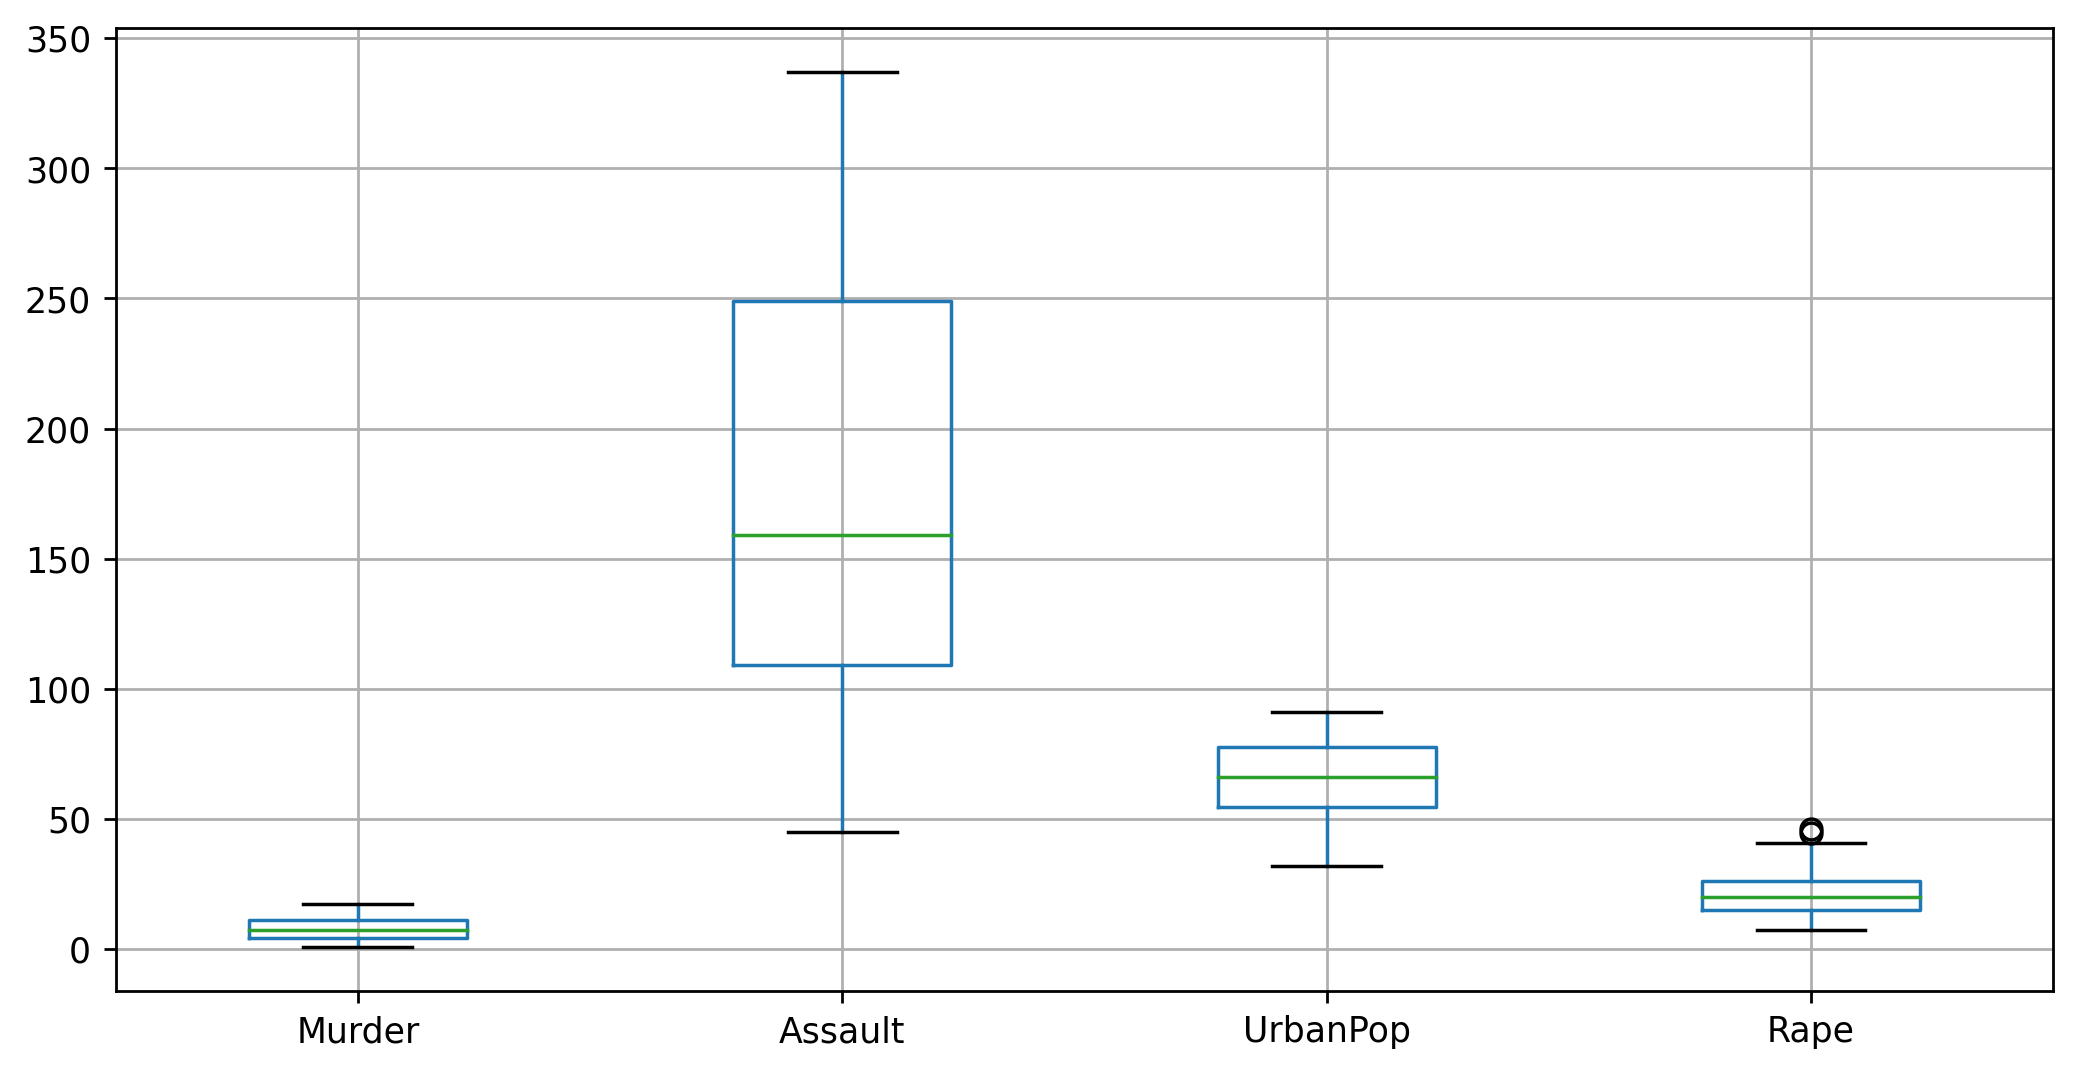

In [63]:
df.boxplot()

In [64]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [65]:
#Model Building
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x) 
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

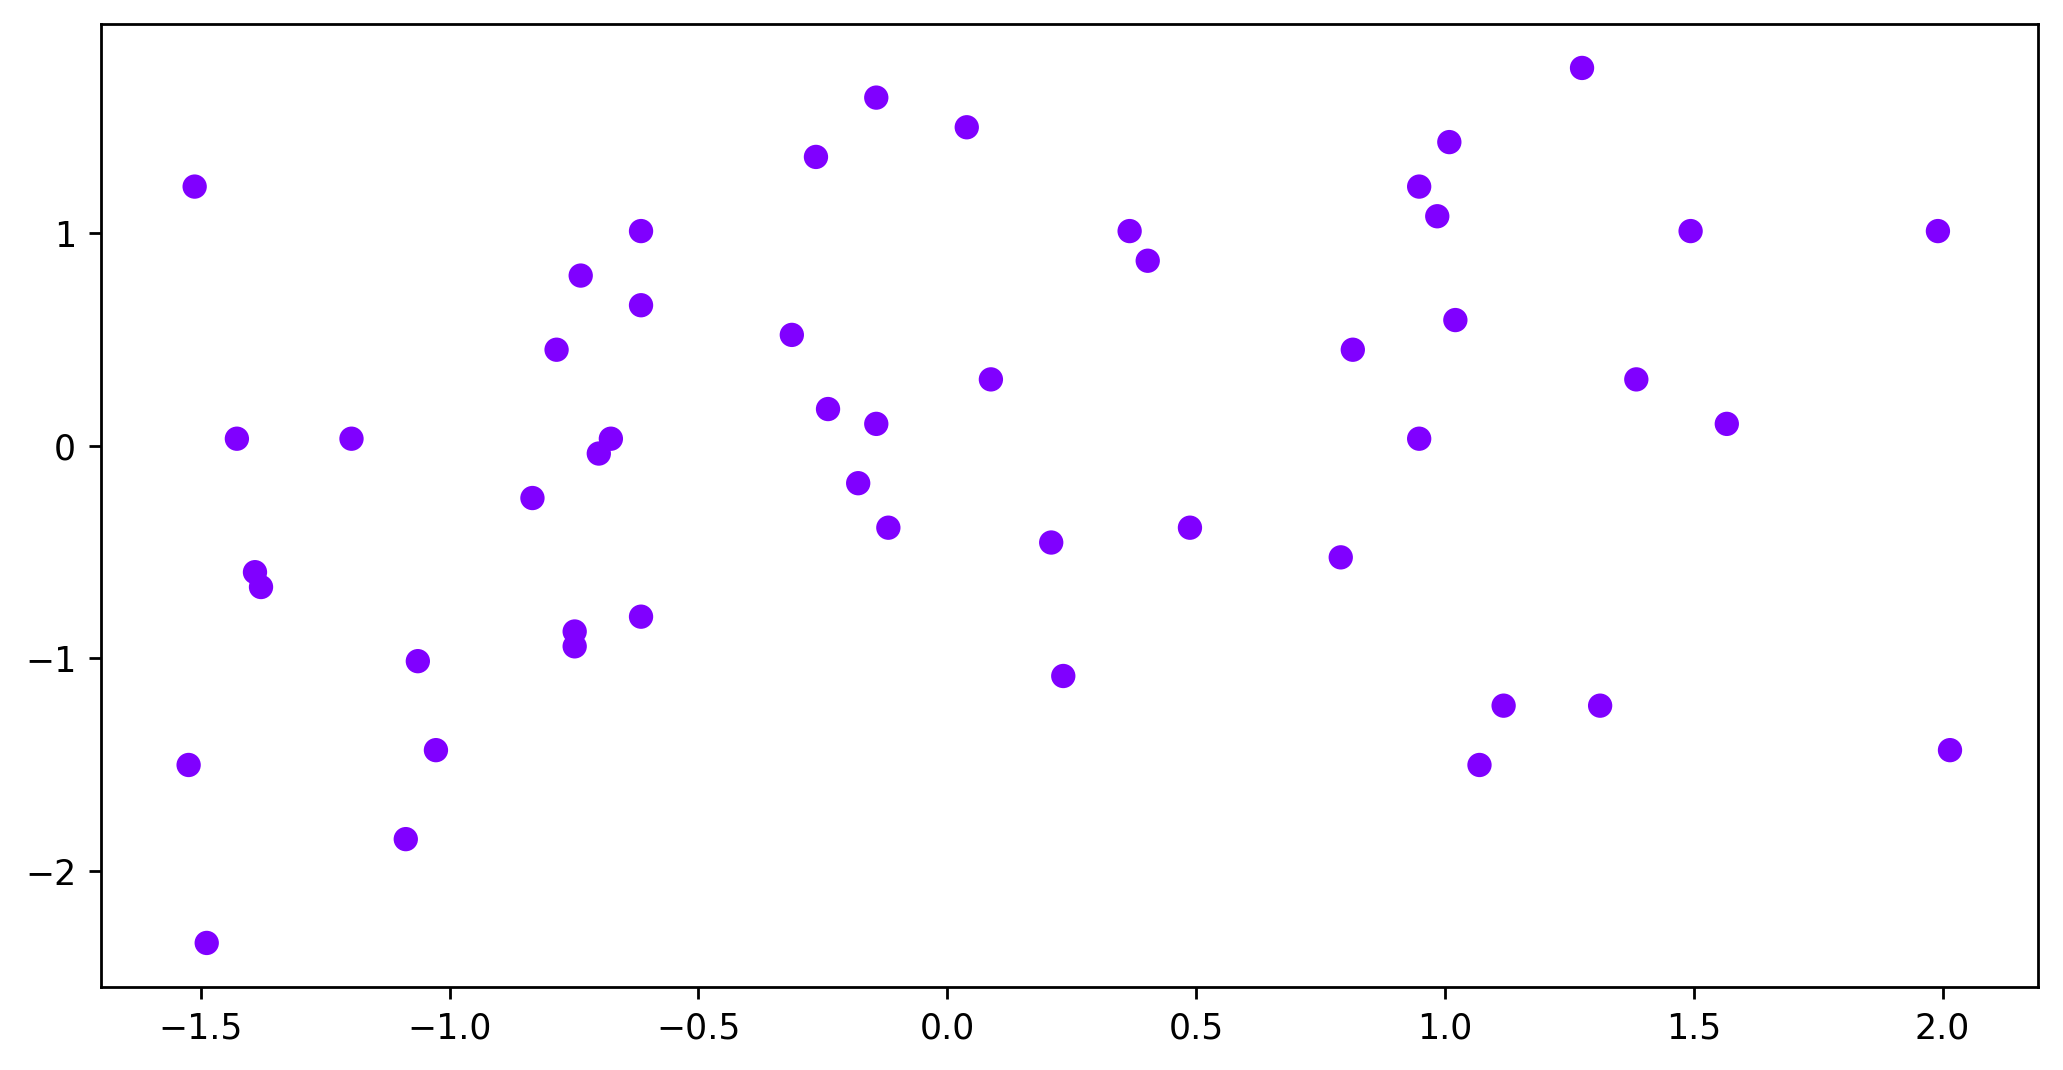

In [66]:
plt.scatter(x[:,1],x[:,2],c = y,cmap = 'rainbow')

In [67]:
#Analyze the clusters
df['Cluster'] = y
df

Murder  Assault  UrbanPop  Rape  Cluster
0     13.2      236        58  21.2       -1
1     10.0      263        48  44.5       -1
2      8.1      294        80  31.0       -1
3      8.8      190        50  19.5       -1
4      9.0      276        91  40.6       -1
5      7.9      204        78  38.7       -1
6      3.3      110        77  11.1       -1
7      5.9      238        72  15.8       -1
8     15.4      335        80  31.9       -1
9     17.4      211        60  25.8       -1
10     5.3       46        83  20.2       -1
11     2.6      120        54  14.2       -1
12    10.4      249        83  24.0       -1
13     7.2      113        65  21.0       -1
14     2.2       56        57  11.3       -1
15     6.0      115        66  18.0       -1
16     9.7      109        52  16.3       -1
17    15.4      249        66  22.2       -1
18     2.1       83        51   7.8       -1
19    11.3      300        67  27.8       -1
20     4.4      149        85  16.3       -1
21    12.1      255        74  35.1       -1
22     2.7       72        66  14.9       -1
23    16.1      259        44  17.1       -1
24     9.0      178        70  28.2       -1
25     6.0      109        53  16.4       -1
26     4.3      102        62  16.5       -1
27    12.2      252        81  46.0       -1
28     2.1       57        56   9.5       -1
29     7.4      159        89  18.8       -1
30    11.4      285        70  32.1       -1
31    11.1      254        86  26.1       -1
32    13.0      337        45  16.1       -1
33     0.8       45        44   7.3       -1
34     7.3      120        75  21.4       -1
35     6.6      151        68  20.0       -1
36     4.9      159        67  29.3       -1
37     6.3      106        72  14.9       -1
38     3.4      174        87   8.3       -1
39    14.4      279        48  22.5       -1
40     3.8       86        45  12.8       -1
41    13.2      188        59  26.9       -1
42    12.7      201        80  25.5       -1
43     3.2      120        80  22.9       -1
44     2.2       48        32  11.2       -1
45     8.5      156        63  20.7       -1
46     4.0      145        73  26.2       -1
47     5.7       81        39   9.3       -1
48     2.6       53        66  10.8       -1
49     6.8      161        60  15.6       -1

In [68]:
'''Here eps value is very very small thats why we are getting  only one cluster and all data points are treated as outlier data point'''

'Here eps value is very very small thats why we are getting  only one cluster and all data points are treated as outlier data point'

In [69]:
# Hyperparameter tuning

In [70]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [71]:
neigh.kneighbors(x)

(array([[0.        , 0.78006247, 0.84928467],
        [0.        , 2.07898369, 2.13697134],
        [0.        , 1.0482199 , 1.08341076],
        [0.        , 1.0013278 , 1.00722663],
        [0.        , 1.20897691, 1.30069114],
        [0.        , 1.24886253, 1.30069114],
        [0.        , 0.88100359, 0.95643249],
        [0.        , 1.19227586, 1.27140067],
        [0.        , 1.30974334, 1.34926273],
        [0.        , 0.86797806, 1.02250187],
        [0.        , 1.08184506, 1.16110091],
        [0.        , 0.75913104, 0.81522244],
        [0.        , 0.35377437, 0.83250223],
        [0.        , 0.43312429, 0.53571007],
        [0.        , 0.2079438 , 0.63822131],
        [0.        , 0.43312429, 0.52515083],
        [0.        , 0.8610239 , 1.07057017],
        [0.        , 0.78006247, 0.86797806],
        [0.        , 0.50466926, 0.65227142],
        [0.        , 0.54082482, 1.09106451],
        [0.        , 0.80586349, 0.91073424],
        [0.        , 0.58411812, 1

In [72]:
d,index = neigh.kneighbors(x)
d

array([[0.        , 0.78006247, 0.84928467],
       [0.        , 2.07898369, 2.13697134],
       [0.        , 1.0482199 , 1.08341076],
       [0.        , 1.0013278 , 1.00722663],
       [0.        , 1.20897691, 1.30069114],
       [0.        , 1.24886253, 1.30069114],
       [0.        , 0.88100359, 0.95643249],
       [0.        , 1.19227586, 1.27140067],
       [0.        , 1.30974334, 1.34926273],
       [0.        , 0.86797806, 1.02250187],
       [0.        , 1.08184506, 1.16110091],
       [0.        , 0.75913104, 0.81522244],
       [0.        , 0.35377437, 0.83250223],
       [0.        , 0.43312429, 0.53571007],
       [0.        , 0.2079438 , 0.63822131],
       [0.        , 0.43312429, 0.52515083],
       [0.        , 0.8610239 , 1.07057017],
       [0.        , 0.78006247, 0.86797806],
       [0.        , 0.50466926, 0.65227142],
       [0.        , 0.54082482, 1.09106451],
       [0.        , 0.80586349, 0.91073424],
       [0.        , 0.58411812, 1.09106451],
       [0.

In [73]:
distance = np.sort(d[:,1])
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0.5, 1.0, 'K-Distance Graph')

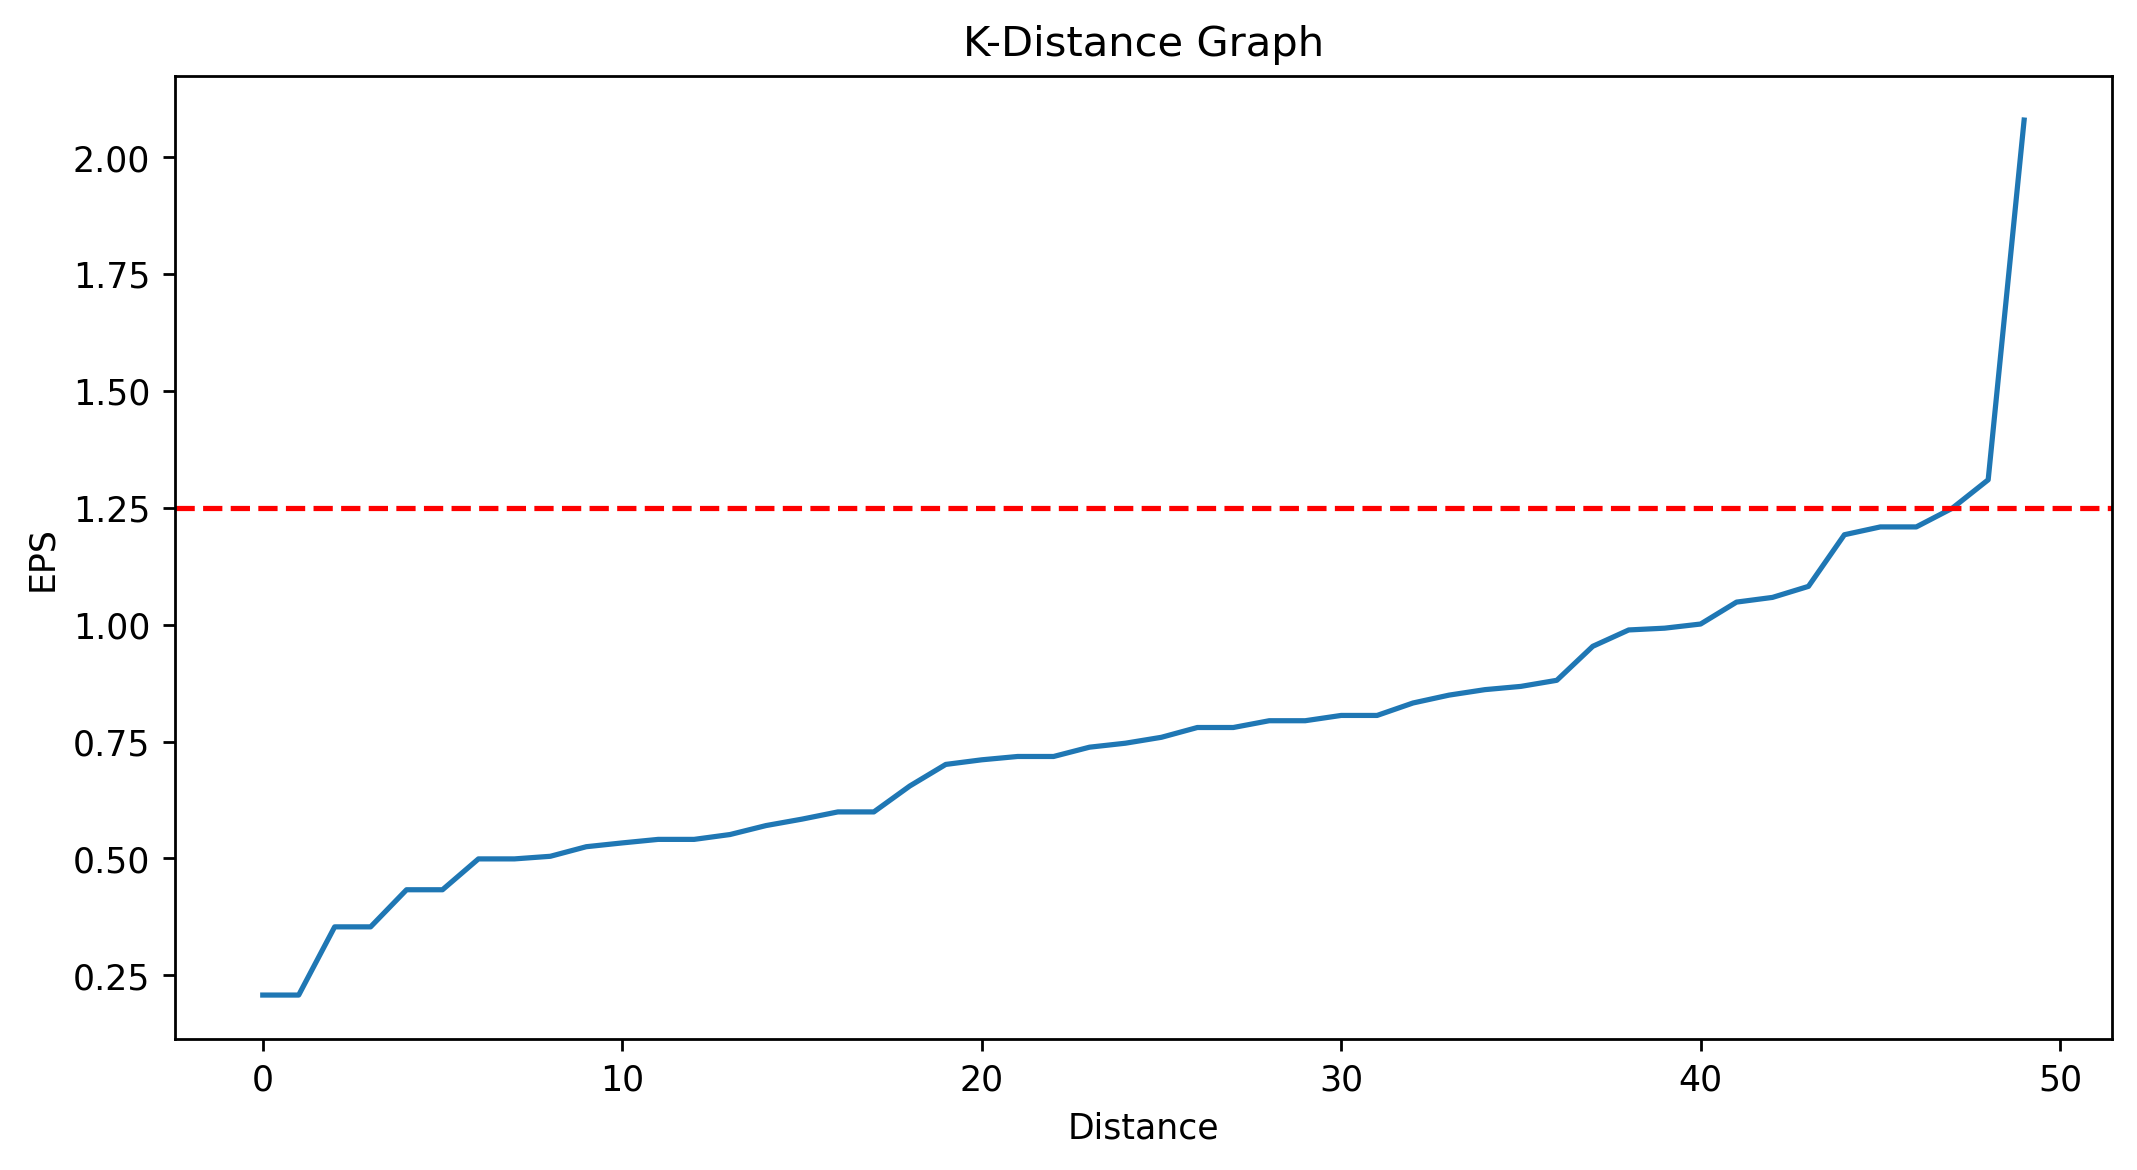

In [74]:
plt.plot(distance)
plt.axhline(y=1.25, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [75]:
#Evaluate the model

In [76]:
db = DBSCAN(eps=1.25,min_samples=8)
yp = db.fit_predict(x)
yp

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

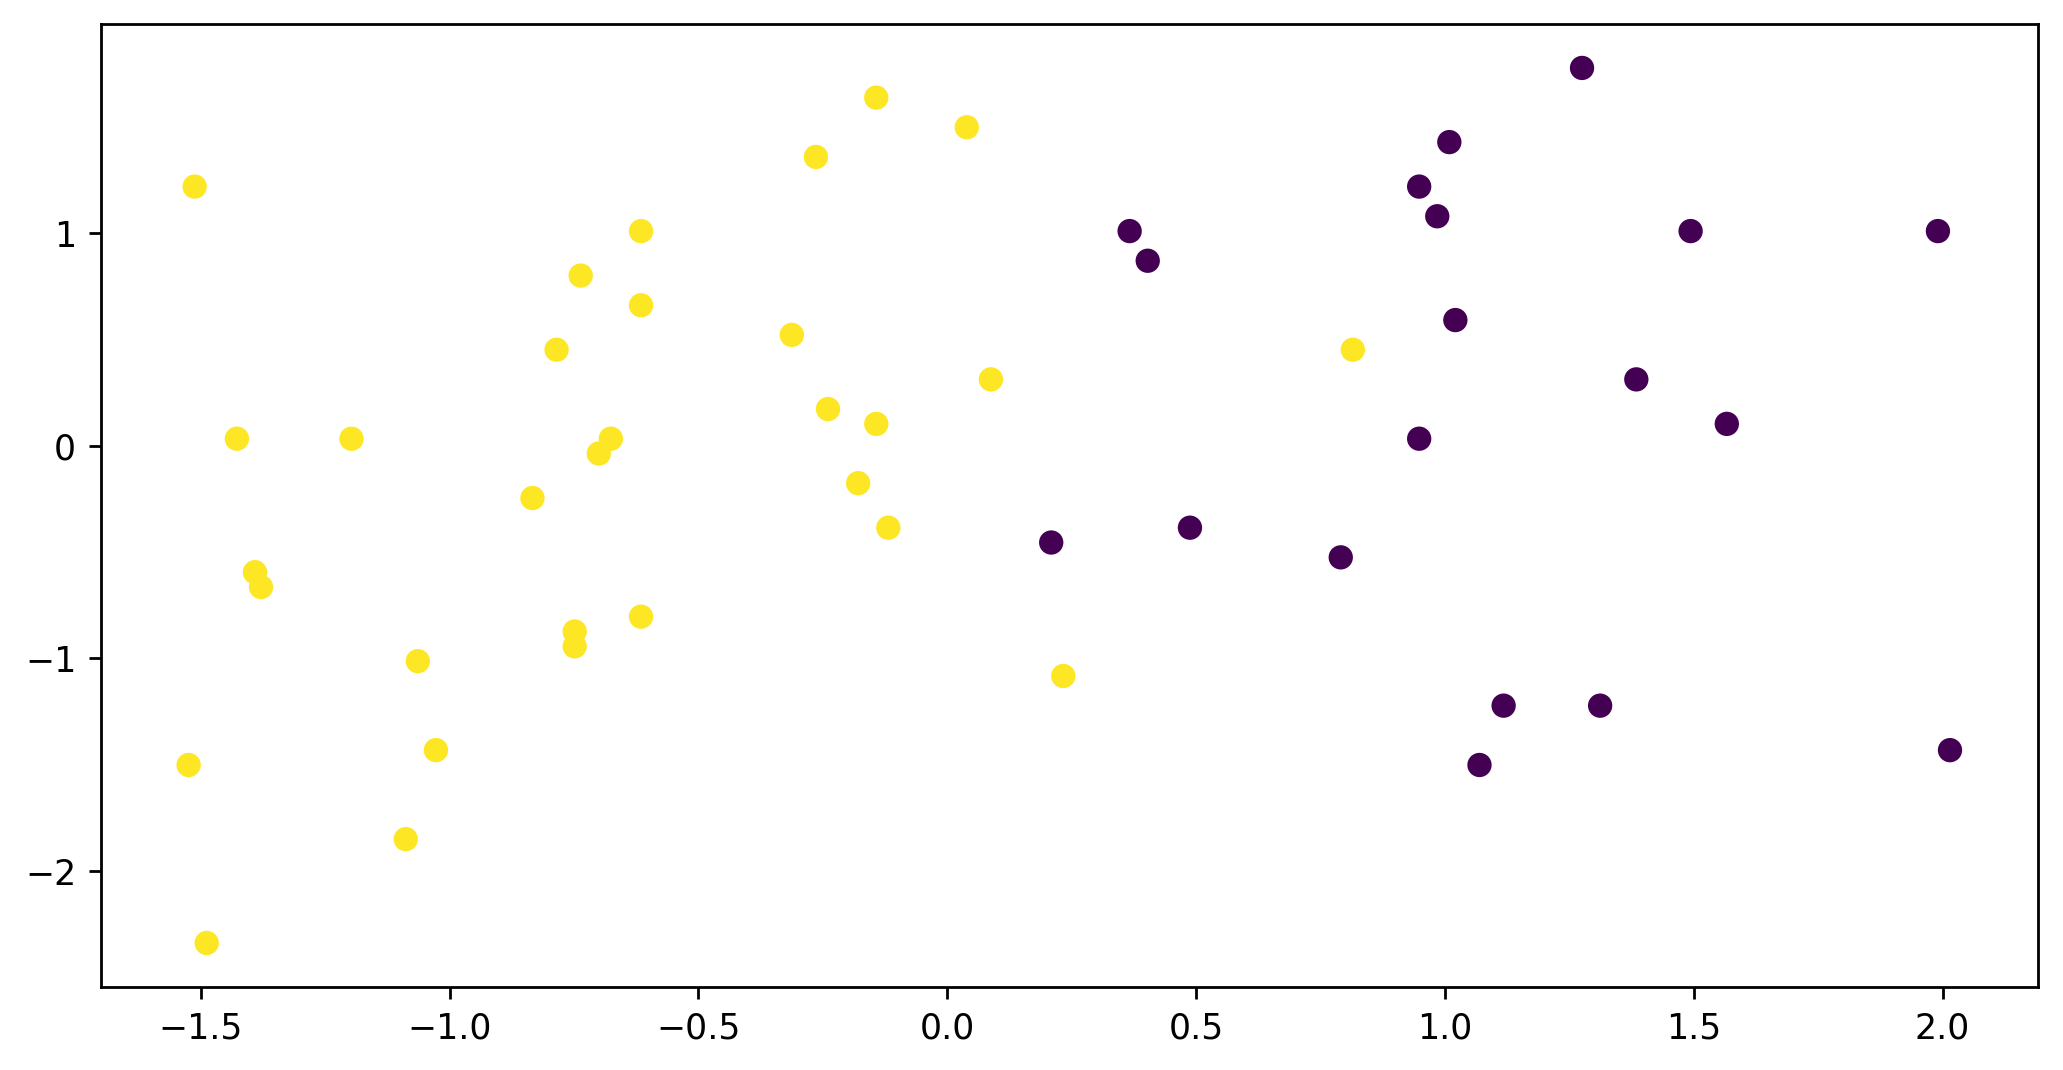

In [77]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='viridis')

In [78]:
silhouette_score(x,yp)

0.4047944502519567

In [79]:
#Analyze the clusters
df['Cluster'] = yp
df

Murder  Assault  UrbanPop  Rape  Cluster
0     13.2      236        58  21.2       -1
1     10.0      263        48  44.5       -1
2      8.1      294        80  31.0       -1
3      8.8      190        50  19.5        0
4      9.0      276        91  40.6       -1
5      7.9      204        78  38.7       -1
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
8     15.4      335        80  31.9       -1
9     17.4      211        60  25.8       -1
10     5.3       46        83  20.2        0
11     2.6      120        54  14.2        0
12    10.4      249        83  24.0       -1
13     7.2      113        65  21.0        0
14     2.2       56        57  11.3        0
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        0
17    15.4      249        66  22.2       -1
18     2.1       83        51   7.8        0
19    11.3      300        67  27.8       -1
20     4.4      149        85  16.3        0
21    12.1      255        74  35.1       -1
22     2.7       72        66  14.9        0
23    16.1      259        44  17.1       -1
24     9.0      178        70  28.2        0
25     6.0      109        53  16.4        0
26     4.3      102        62  16.5        0
27    12.2      252        81  46.0       -1
28     2.1       57        56   9.5        0
29     7.4      159        89  18.8        0
30    11.4      285        70  32.1       -1
31    11.1      254        86  26.1       -1
32    13.0      337        45  16.1       -1
33     0.8       45        44   7.3        0
34     7.3      120        75  21.4        0
35     6.6      151        68  20.0        0
36     4.9      159        67  29.3        0
37     6.3      106        72  14.9        0
38     3.4      174        87   8.3        0
39    14.4      279        48  22.5       -1
40     3.8       86        45  12.8        0
41    13.2      188        59  26.9       -1
42    12.7      201        80  25.5       -1
43     3.2      120        80  22.9        0
44     2.2       48        32  11.2        0
45     8.5      156        63  20.7        0
46     4.0      145        73  26.2        0
47     5.7       81        39   9.3        0
48     2.6       53        66  10.8        0
49     6.8      161        60  15.6        0

In [80]:
df['Cluster'].value_counts()

 0    31
-1    19
Name: Cluster, dtype: int64

In [81]:
data = df[df['Cluster'] == 0]     
data

Murder  Assault  UrbanPop  Rape  Cluster
3      8.8      190        50  19.5        0
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
10     5.3       46        83  20.2        0
11     2.6      120        54  14.2        0
13     7.2      113        65  21.0        0
14     2.2       56        57  11.3        0
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        0
18     2.1       83        51   7.8        0
20     4.4      149        85  16.3        0
22     2.7       72        66  14.9        0
24     9.0      178        70  28.2        0
25     6.0      109        53  16.4        0
26     4.3      102        62  16.5        0
28     2.1       57        56   9.5        0
29     7.4      159        89  18.8        0
33     0.8       45        44   7.3        0
34     7.3      120        75  21.4        0
35     6.6      151        68  20.0        0
36     4.9      159        67  29.3        0
37     6.3      106        72  14.9        0
38     3.4      174        87   8.3        0
40     3.8       86        45  12.8        0
43     3.2      120        80  22.9        0
44     2.2       48        32  11.2        0
45     8.5      156        63  20.7        0
46     4.0      145        73  26.2        0
47     5.7       81        39   9.3        0
48     2.6       53        66  10.8        0
49     6.8      161        60  15.6        0

In [82]:
df.groupby('Cluster').agg('mean')

Murder     Assault   UrbanPop       Rape
Cluster                                             
-1       12.331579  259.315789  68.315789  29.215789
 0        5.003226  116.483871  63.838710  16.338710

In [83]:
'''0 indicating original data set there is only one cluster. 
-1 indicating  data points are outlier. Outlier are not going to get accommodated in any cluster
'''

'0 indicating original data set there is only one cluster. \n-1 indicating  data points are outlier. Outlier are not going to get accommodated in any cluster\n'

In [84]:
''' The 5% murder rate in different places of United States may experience lower levels of violent crimes.
And 64% Population living in urban in different places of United States.
16% rape rate indicate lower incidence of sexual offenses camparatively assault.
Assualt rate is very high in different places of United States.'''

' The 5% murder rate in different places of United States may experience lower levels of violent crimes.\nAnd 64% Population living in urban in different places of United States.\n16% rape rate indicate lower incidence of sexual offenses camparatively assault.\nAssualt rate is very high in different places of United States.'